<a href="https://colab.research.google.com/github/MarioGonzalez99/final-project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configurations for Google Collab

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# %cd /content/drive/MyDrive/UoL/FinalProject/Data

/content/drive/MyDrive/UoL/FinalProject/Data


# Final Project Notebook

Import key libraries

In [3]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML Models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Metrics
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay,
                            PrecisionRecallDisplay, RocCurveDisplay,
                            confusion_matrix, roc_curve, auc,
                            precision_recall_curve, average_precision_score)

# Utils
import os
import random

## Load data and perform EDA

The first step in our credit card fraud detection project involves loading the dataset into our working environment. This dataset, titled 'creditcard_2023.csv', contains a comprehensive collection of credit card transactions made by European cardholders in 2023. Each transaction record is anonymized to ensure privacy and is characterized by features such as transaction amount, time, and whether the transaction was fraudulent.

Complementing our primary data source, we introduce a secondary dataset, simply referred to as 'creditcard.csv'. This dataset archives credit card transactions from September 2013, also pertaining to European cardholders. Within a two-day transaction window, it encapsulates 492 fraudulent transactions among a total of 284,807, illustrating the highly unbalanced nature of the dataset—fraudulent transactions, or the positive class, constitute merely 0.172% of all transactions.


In [4]:
credit_card_df = pd.read_csv('creditcard_2023.csv')
credit_card_2_df = pd.read_csv('creditcard.csv')

In [5]:
credit_card_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
credit_card_2_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_df.isna().sum().sum()

0

In [8]:
credit_card_2_df.isna().sum().sum()

0

## Performing Exploratory Data Analysis (EDA)

In this project, our EDA will focus on gaining insights into the dataset's structure, such as the distribution of transaction amounts and the time of transactions, as well as understanding the balance between fraudulent and legitimate transactions. This phase is critical for informing our subsequent data preprocessing and modeling steps.

To begin our EDA, we will start with some basic data exploration tasks, including:

- Distribution of Fraud vs Non Fraud Transactions
- Histogram for Feature Distribution
- Correlation Heatmap
- Box Plot for Feature Outliers by Class
- 2D Distribution of Features by Class

## Distribution of Fraud vs Non Fraud Transactions

### Credit Card 2023 Dataset

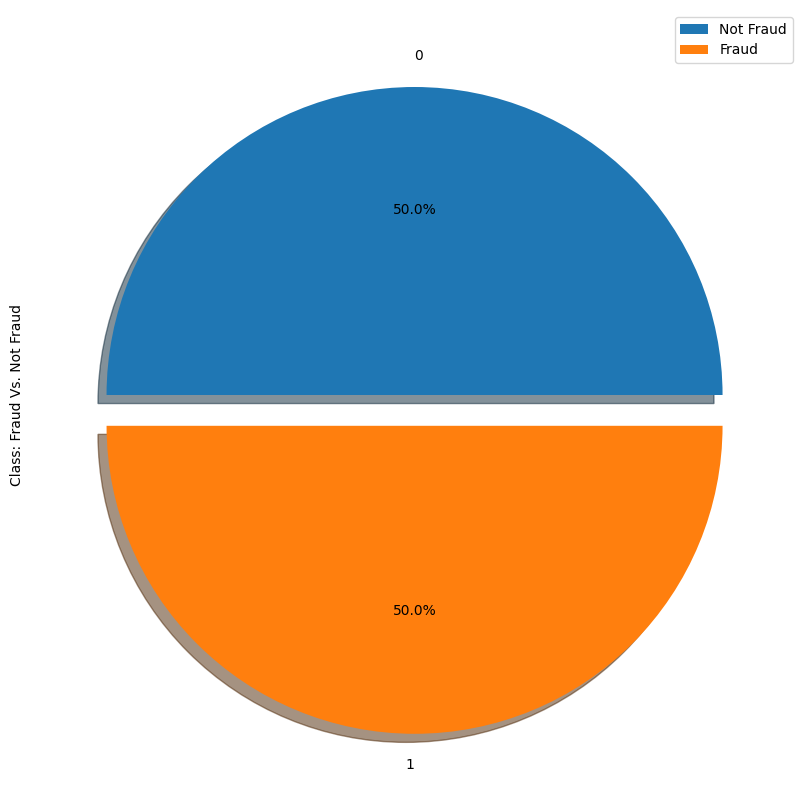

In [9]:
count = credit_card_df["Class"].value_counts()
count.plot(kind="pie", explode = [0, 0.1], figsize = (10, 10), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Class: Fraud Vs. Not Fraud")
plt.legend(["Not Fraud","Fraud"])
plt.show()

The pie plot shows a 50/50 split between non-fraudulent (0) and fraudulent (1) transactions, which are represented by two equal halves of the pie, one in blue and the other orange. However, in real-world credit card transaction datasets, this is an uncommon occurrence. Typically, the vast majority of transactions are not fraudulent, with fraudulent ones accounting for a very small fraction.

The equal distribution could have been purposefully designed for analytical purposes. It is common in machine learning, especially for classification problems, to balance classes in order to avoid bias towards the majority class. This could be an illustration of a balanced dataset used for model training.
The dataset could have been resampled using techniques such as oversampling the minority class (fraudulent transactions) or undersampling the majority class (non-fraudulent transactions) to achieve a 50/50 distribution. This is frequently done to improve the performance of classification models on imbalanced datasets.

This distribution does not correspond to the typical distribution found in real-world credit card transaction data, so models trained on this dataset may not generalize well to real-world scenarios where the class distribution is severely imbalanced.

### Credit Card 2013 Dataset

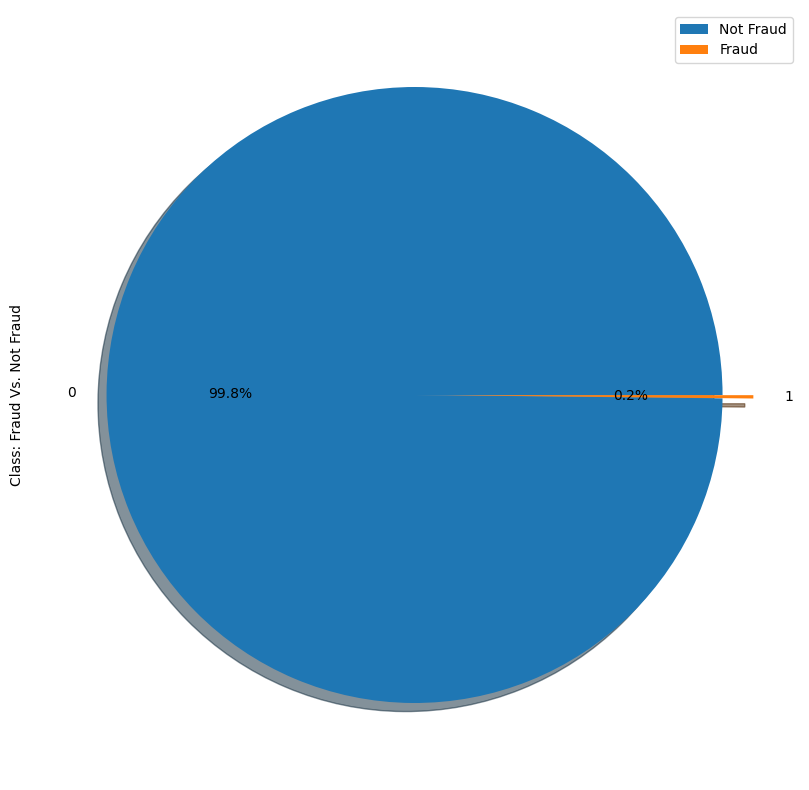

In [10]:
count = credit_card_2_df["Class"].value_counts()
count.plot(kind="pie", explode = [0, 0.1], figsize = (10, 10), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Class: Fraud Vs. Not Fraud")
plt.legend(["Not Fraud","Fraud"])
plt.show()

The pie chart depicts the class distribution in the dataset, revealing a significant imbalance between the two classes: 'Fraud' and 'Not Fraud'. The vast majority of transactions, 99.8%, are legitimate, while only 0.2% are fraudulent.

This disparity is typical of fraud detection datasets, as fraudulent transactions are generally rarer than legitimate ones. However, it poses a significant challenge to predictive modeling. Models trained on such unbalanced data may become biased toward predicting the majority class and underperform in detecting the minority class, which is frequently the class of interest.The pie chart depicts the class distribution in the dataset, revealing a significant imbalance between the two classes: 'Fraud' and 'Not Fraud'. The vast majority of transactions, 99.8%, are legitimate, while only 0.2% are fraudulent.

## Histogram for Feature Distribution
We'll start by examining the distribution of individual anonymized features (V1-V28) to understand their range, central tendency, and dispersion. For example, analyzing V1-V28 could give insights into its spread and how it may influence the transaction's likelihood of being fraudulent.

### Credit Card 2023 Dataset

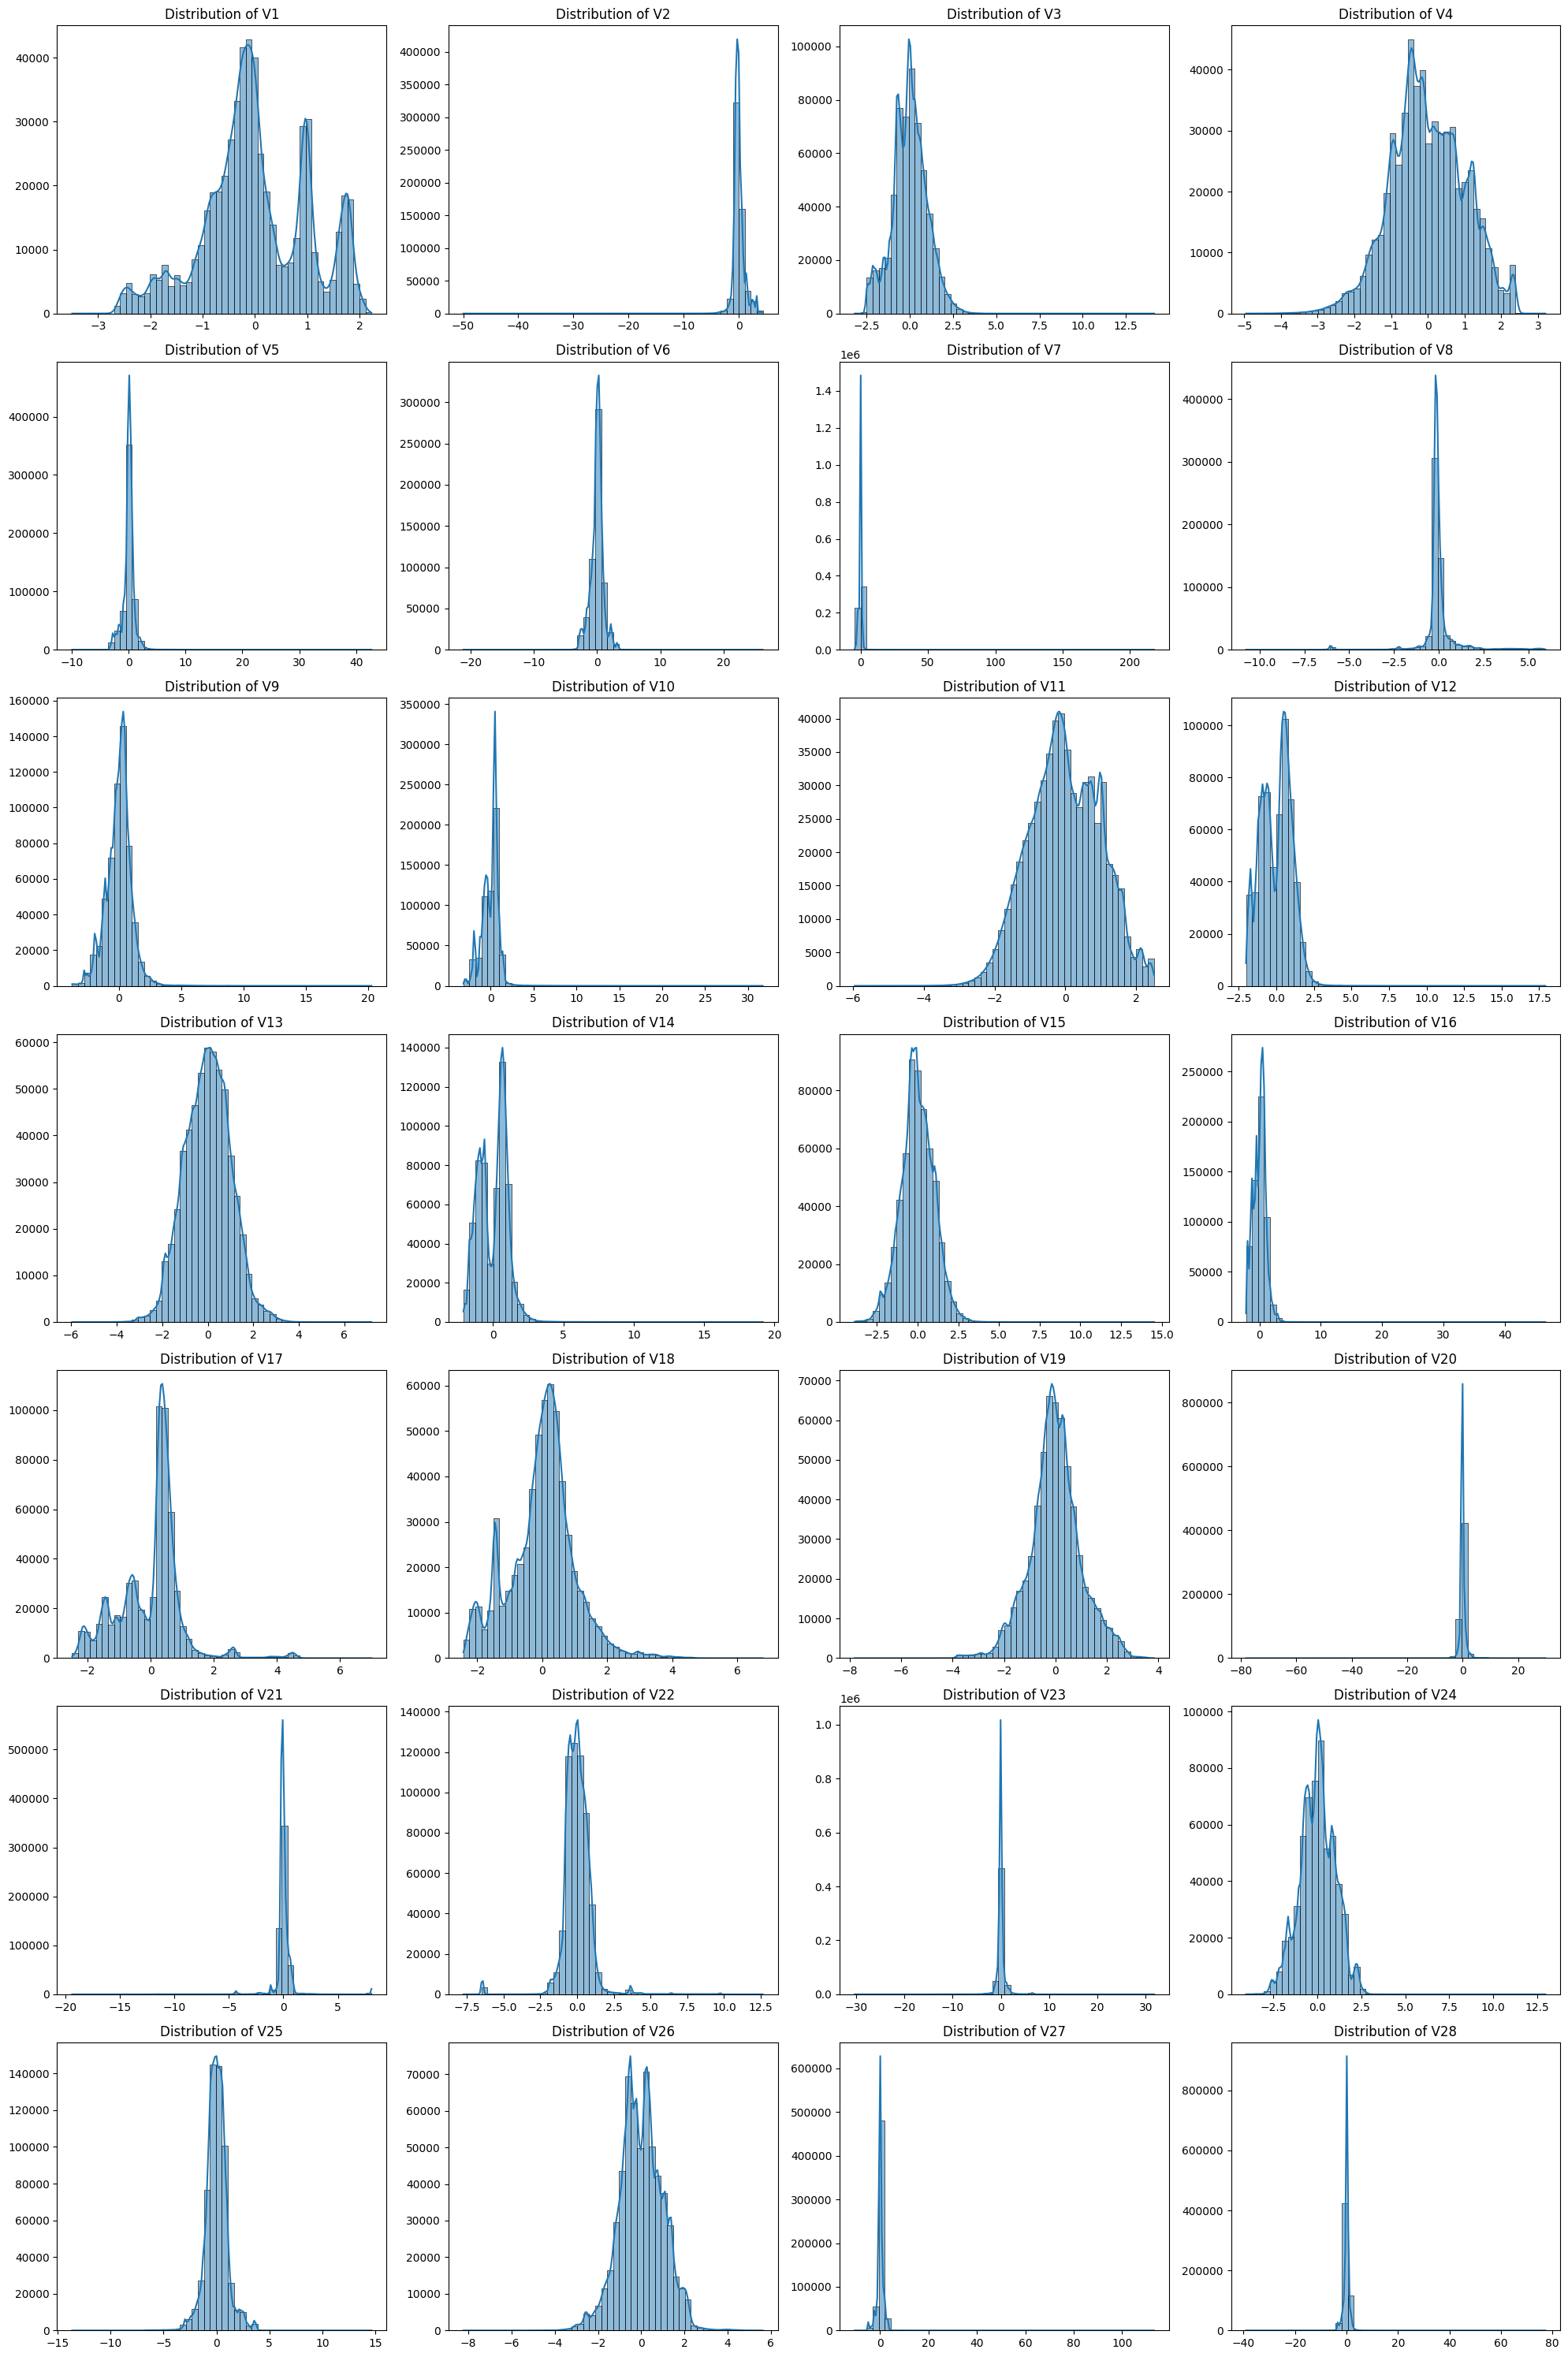

In [11]:
# Set up the matplotlib figure
f, axes = plt.subplots(7, 4, figsize=(20, 30))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Iterate over the anonymized features (V1 to V28)
for i, col in enumerate(['V'+str(i+1) for i in range(28)]):
    sns.histplot(credit_card_df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

The histograms for each feature (V1-V28) exhibit a wide range of distribution characteristics, indicating the transaction data's complexity. Certain variables, such as variables 7, 20, 21, 23, 27, and 28, have a highly concentrated distribution around a central value, which may imply that these features are less variable and, therefore, less informative when considered alone. However, when combined with other features in a model, they can provide useful signals for detecting fraudulent patterns.

### Credit Card 2013 Dataset

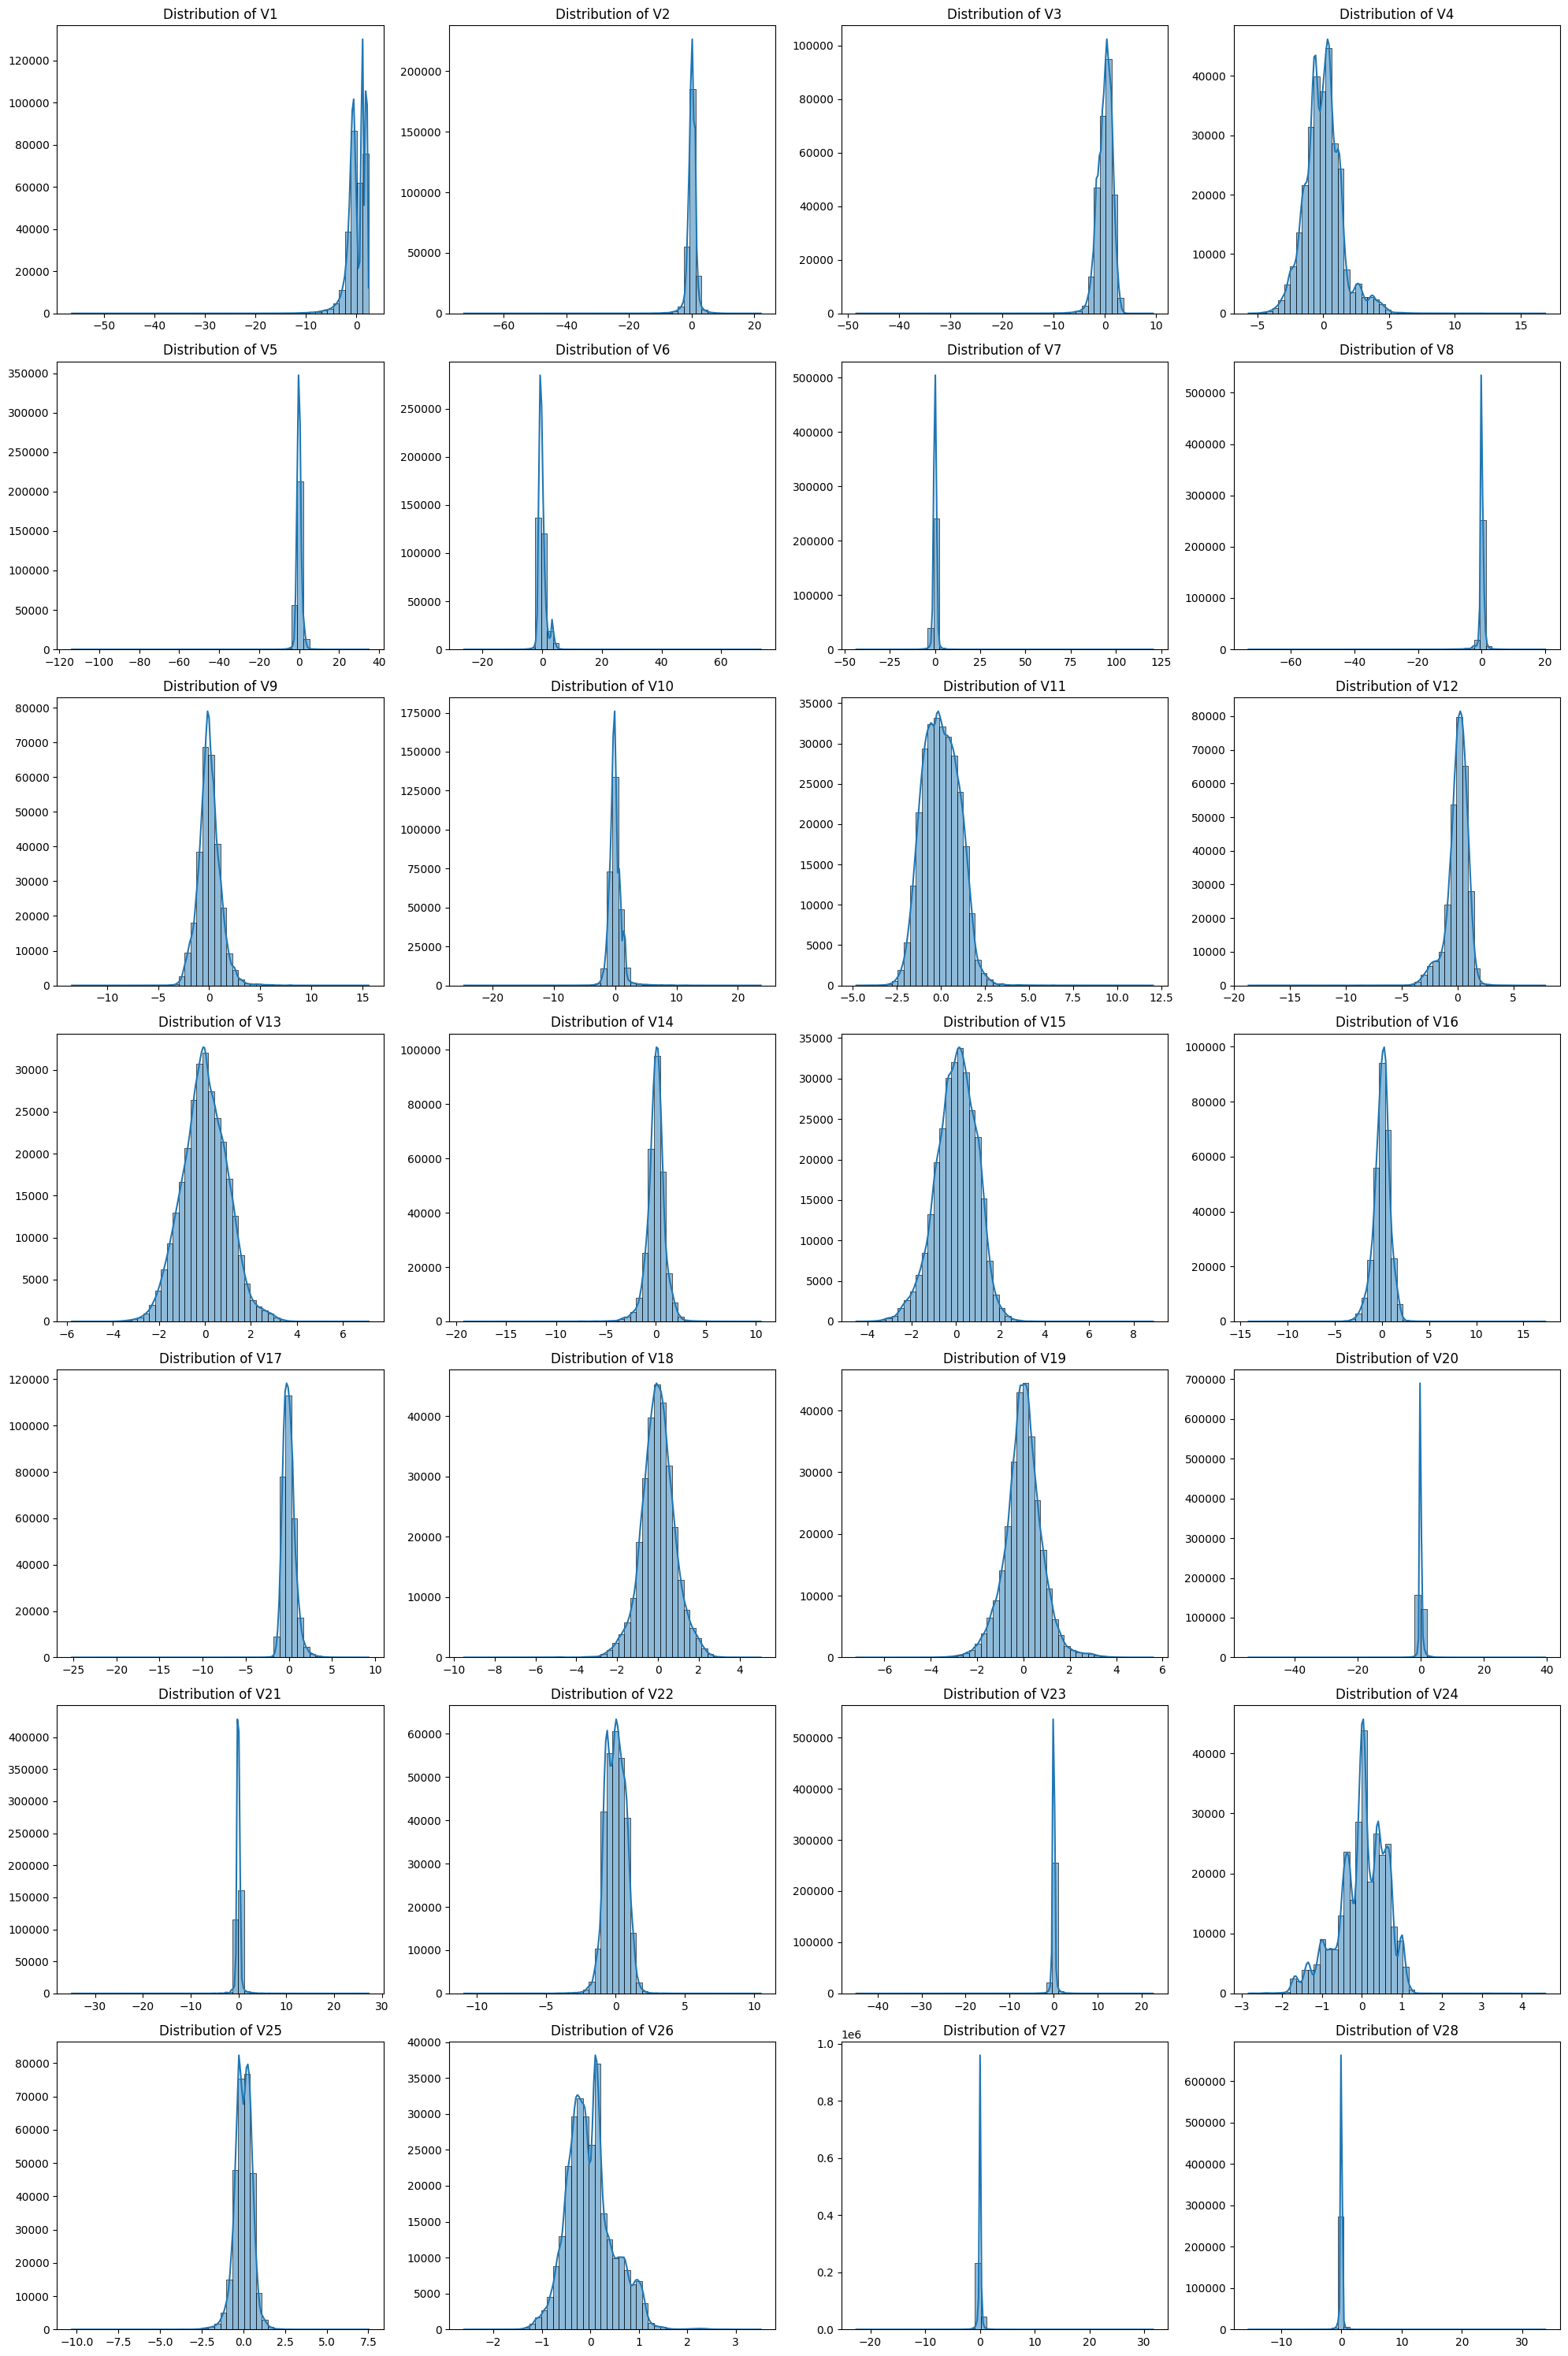

In [12]:
f, axes = plt.subplots(7, 4, figsize=(20, 30))

axes = axes.flatten()

# Iterate over the anonymized features (V1 to V28)
for i, col in enumerate(['V'+str(i+1) for i in range(28)]):
    sns.histplot(credit_card_2_df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

There are visible spikes at the tails of some distributions, hinting at the presence of outliers or extreme values that deviate significantly from the mean.

## Correlation Heatmap
Understanding the correlation between features can provide insights into their relationships and their combined effect on classifying transactions as fraudulent or not.

To display only values in the correlation matrix closer to 1 or -1, we can mask values within a certain threshold around zero to focus on stronger correlations.

### Credit Card 2023 Dataset

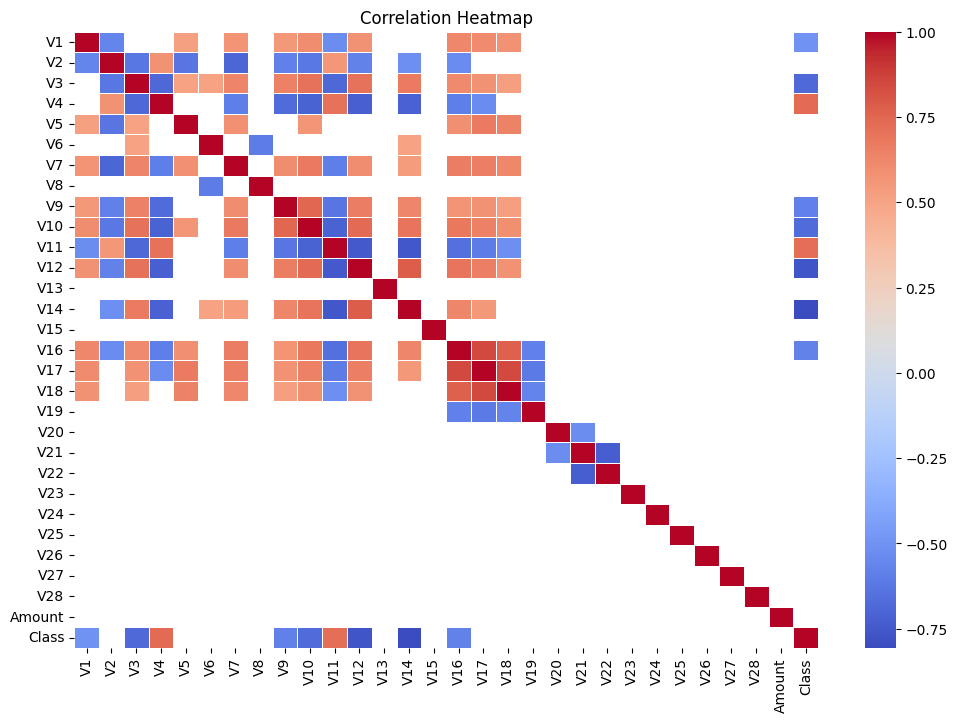

In [13]:
# Calculate the correlation matrix
correlation_matrix = credit_card_df.drop('id', axis=1).corr()

# Create a mask to display only correlations close to 1 or -1
threshold = 0.5
mask = np.abs(correlation_matrix) < threshold

plt.figure(figsize=(12, 8))
# Use the mask in the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

Variables V1, V3, V9, V10, V12, V14, and V16 have a significant negative correlation with 'Class'. This suggests that higher values for these features correspond to legitimate transactions, whereas lower values may indicate fraudulent activity.

On the other hand, V4 and V11 are positively correlated with 'Class', implying that higher values of these features may correspond to fraudulent transactions.

### Credit Card 2013 Dataset

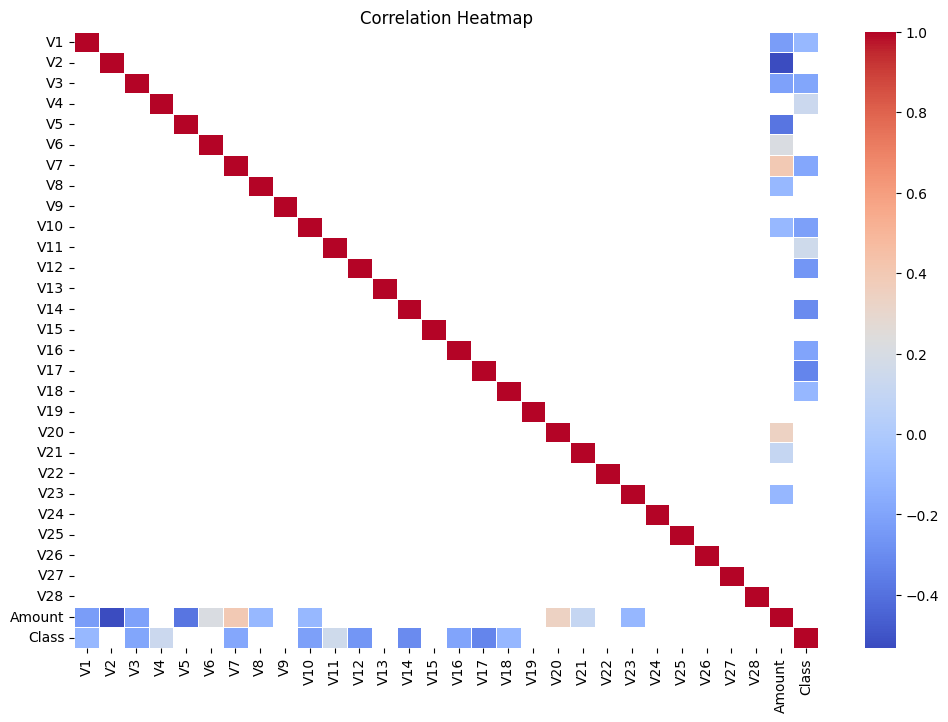

In [14]:
# Calculate the correlation matrix
correlation_matrix = credit_card_2_df.drop('Time', axis=1).corr()

# Create a mask to display only correlations close to 1 or -1
threshold = 0.1
mask = np.abs(correlation_matrix) < threshold

plt.figure(figsize=(12, 8))
# Use the mask in the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

Because PCA features are intended to be orthogonal, a lack of significant correlation among these features is expected, as evidenced by the minimal off-diagonal blue patches, which indicate low correlation between variables.

## Box Plot for Feature Outliers by Class
Outliers can significantly influence model performance. By plotting features like V1-V28 against the class, we can identify outlier distributions in fraudulent versus non-fraudulent transactions.

### Credit Card 2023 Dataset

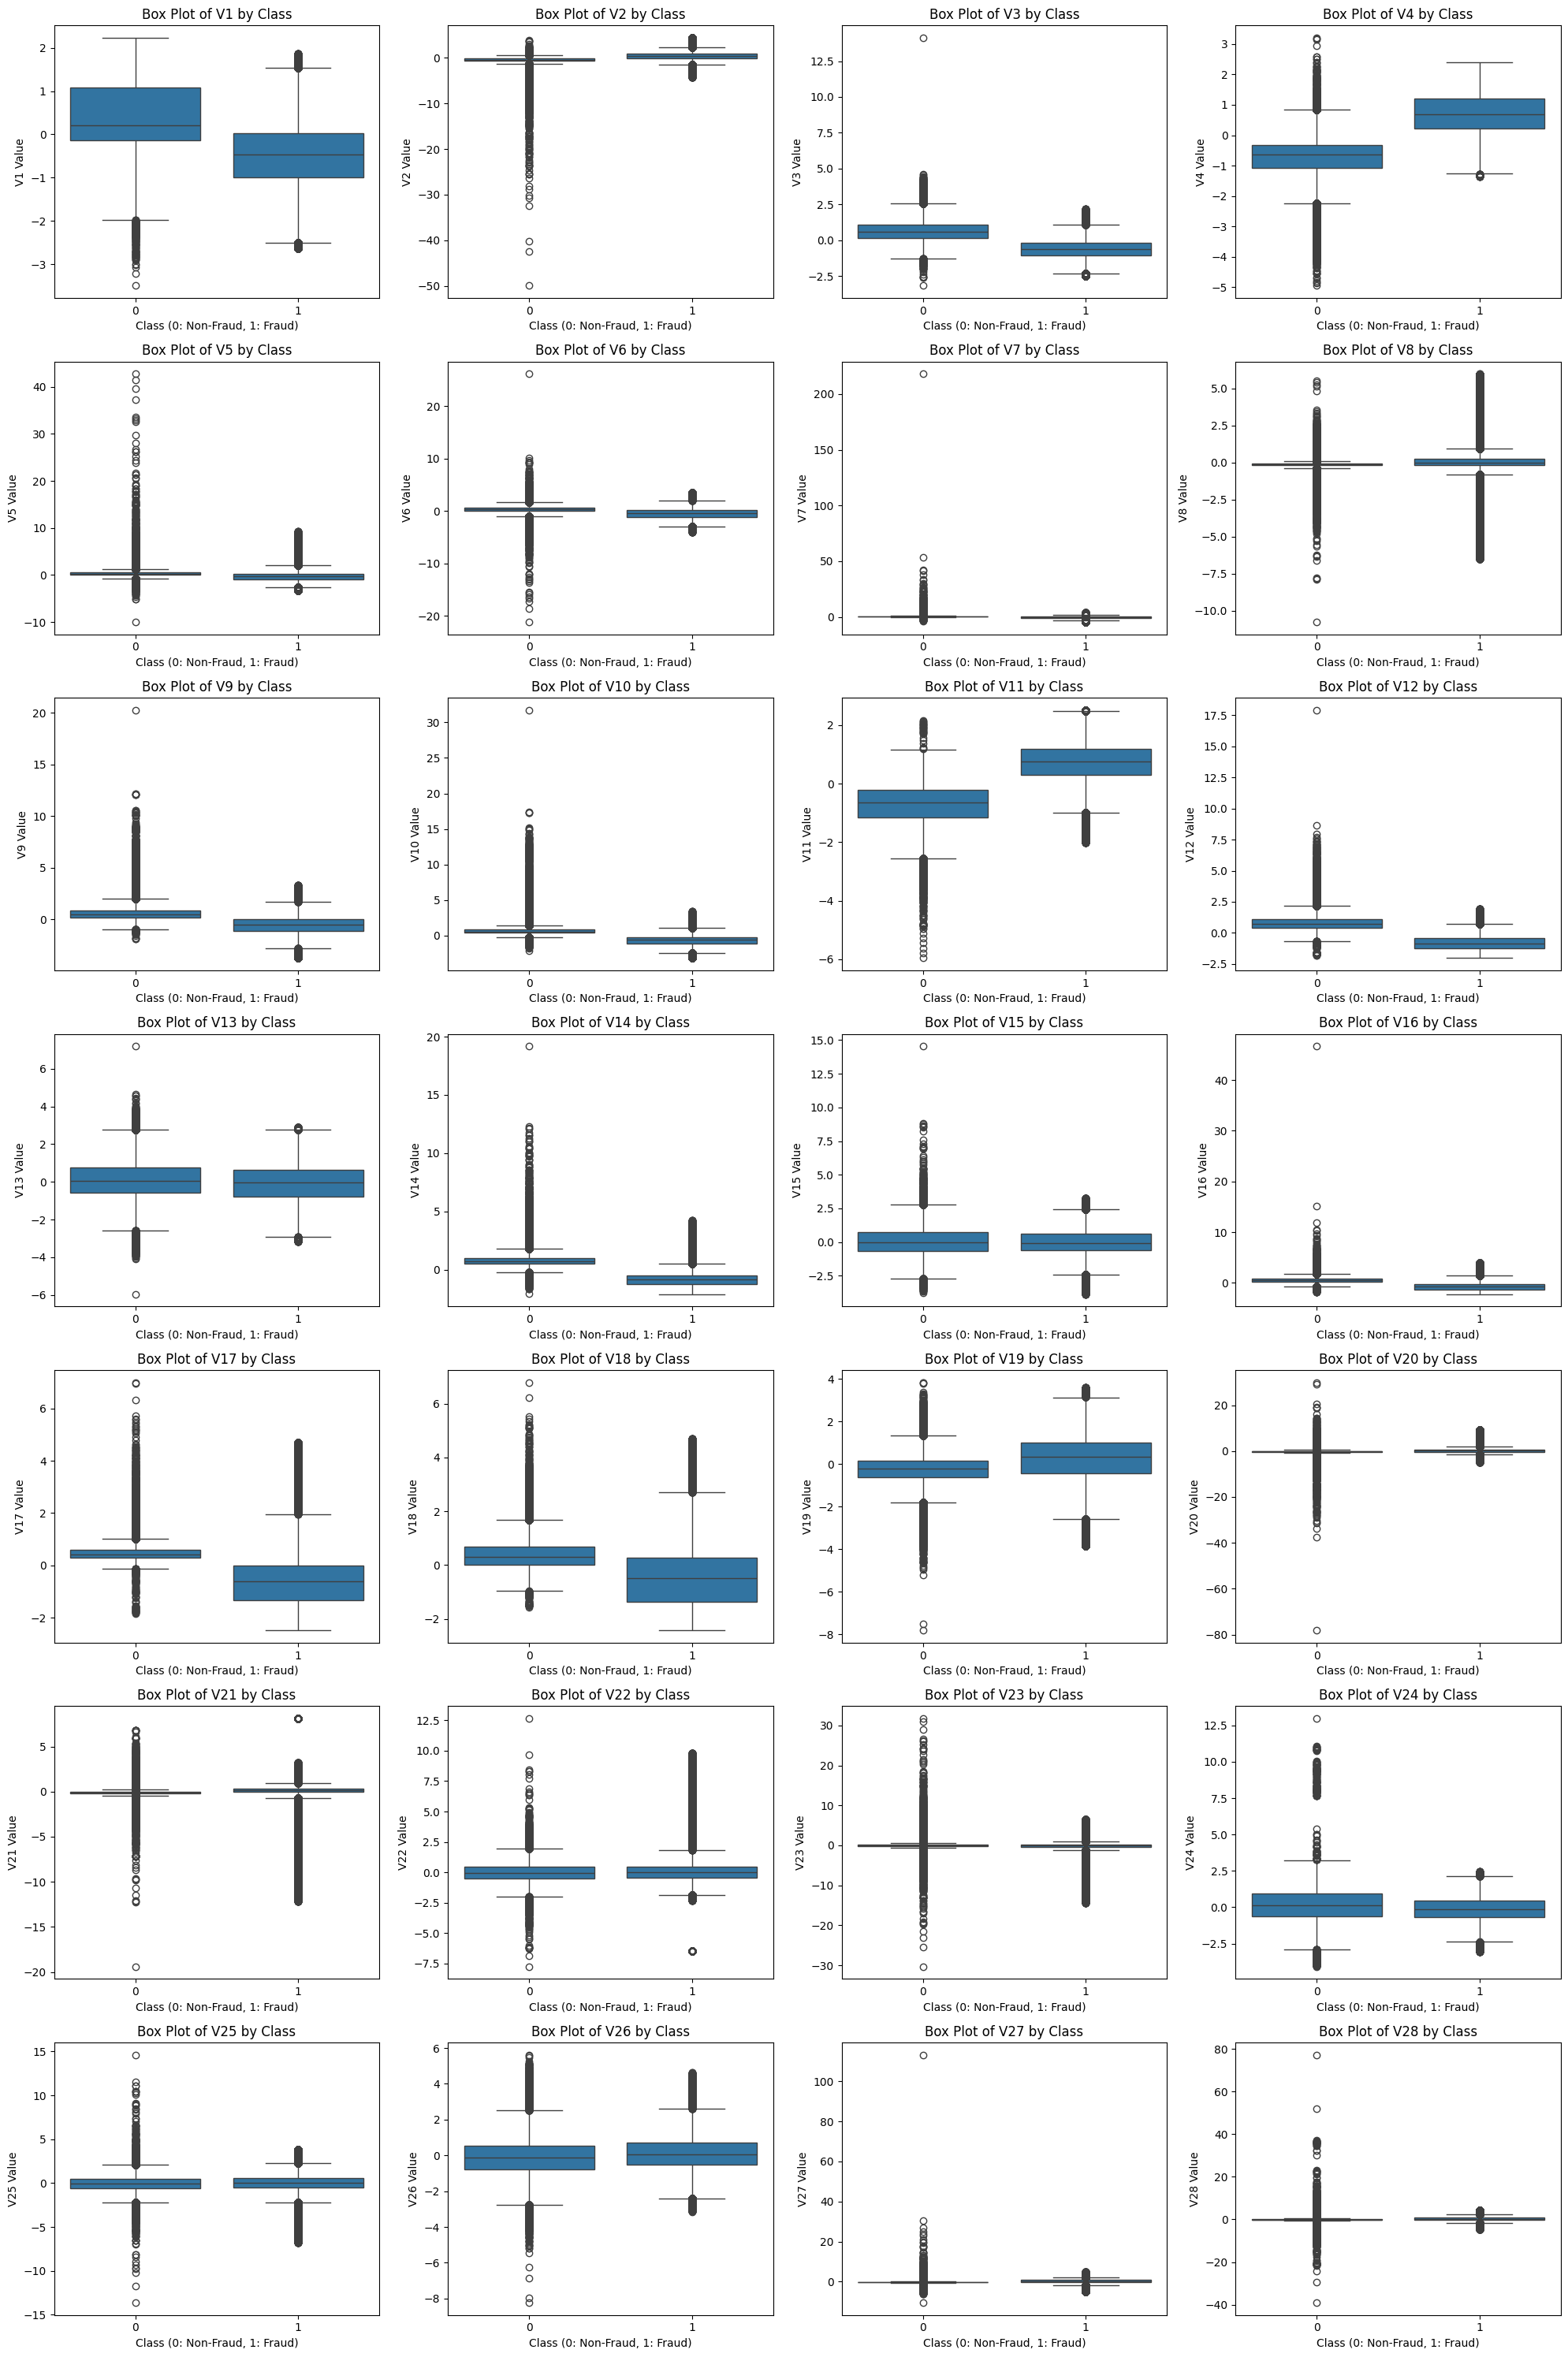

In [15]:
# Setting up the figure size and grid
fig, axes = plt.subplots(7, 4, figsize=(20, 30))  # Adjust the grid size (7 rows x 4 columns) as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Looping through each feature and creating a box plot
for i, feature in enumerate(['V'+str(i) for i in range(1, 29)]):
    sns.boxplot(x='Class', y=feature, data=credit_card_df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Class')
    axes[i].set_xlabel('Class (0: Non-Fraud, 1: Fraud)')
    axes[i].set_ylabel(f'{feature} Value')

# Adjust layout to make room for titles and labels
plt.tight_layout()
plt.show()

For non-fraudulent transactions, outliers are noticeable across most features, indicating significant deviations from the typical range of values. This could imply that legitimate transactions exhibit a wide range of behaviors, as is expected in everyday spending activities.

The fraudulent class has fewer outliers in the box plots. This could imply that fraudulent transactions follow a more consistent pattern, possibly as a result of fraudsters attempting to avoid detection by imitating typical transaction behaviors.

### Credit Card 2013 Dataset

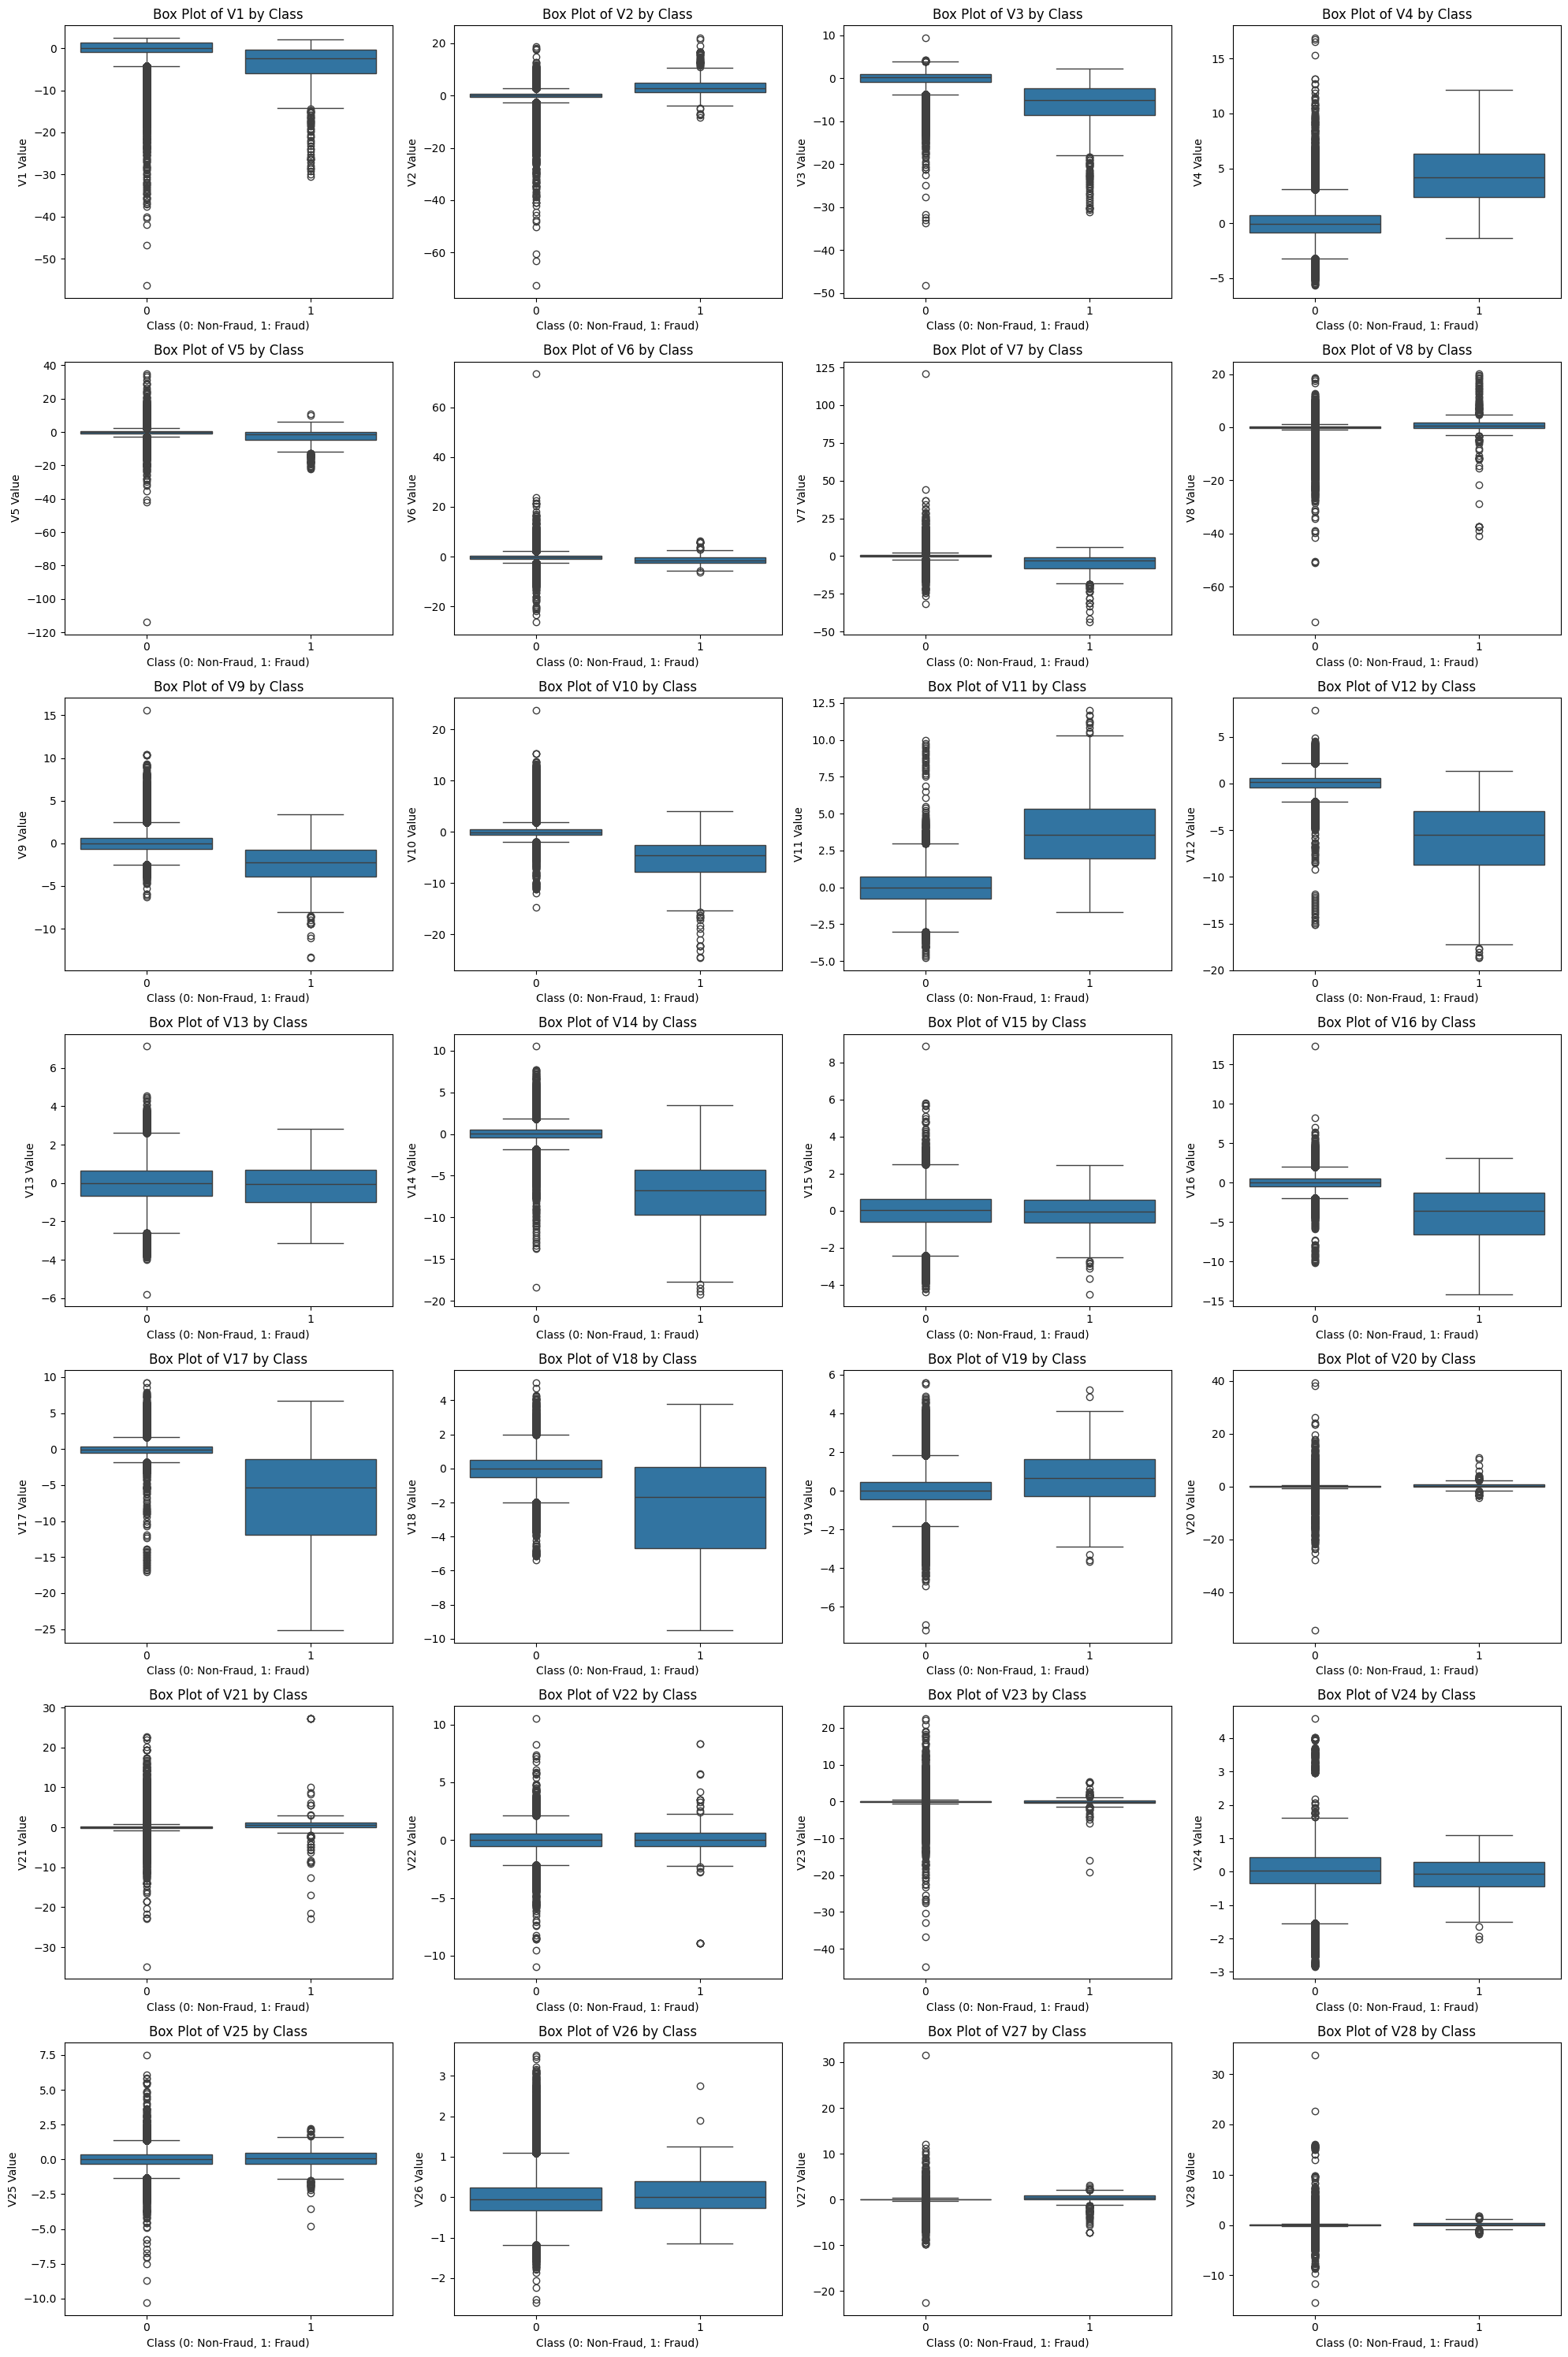

In [16]:
# Setting up the figure size and grid
fig, axes = plt.subplots(7, 4, figsize=(20, 30))  # Adjust the grid size (7 rows x 4 columns) as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Looping through each feature and creating a box plot
for i, feature in enumerate(['V'+str(i) for i in range(1, 29)]):
    sns.boxplot(x='Class', y=feature, data=credit_card_2_df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Class')
    axes[i].set_xlabel('Class (0: Non-Fraud, 1: Fraud)')
    axes[i].set_ylabel(f'{feature} Value')

# Adjust layout to make room for titles and labels
plt.tight_layout()
plt.show()

In many cases, the 'Non-Fraud' class appears to have more outliers than the 'Fraud' class, which could be due to a higher number of non-fraudulent transactions. However, the presence of outliers in the 'Fraud' class may indicate unusual patterns associated with fraudulent activities.

### 2D Distribution of Features by Class
A 2D scatter plot can help visualize the distribution of transactions based on two features, providing insights into their separability by class.

### Credit Card 2023 Dataset

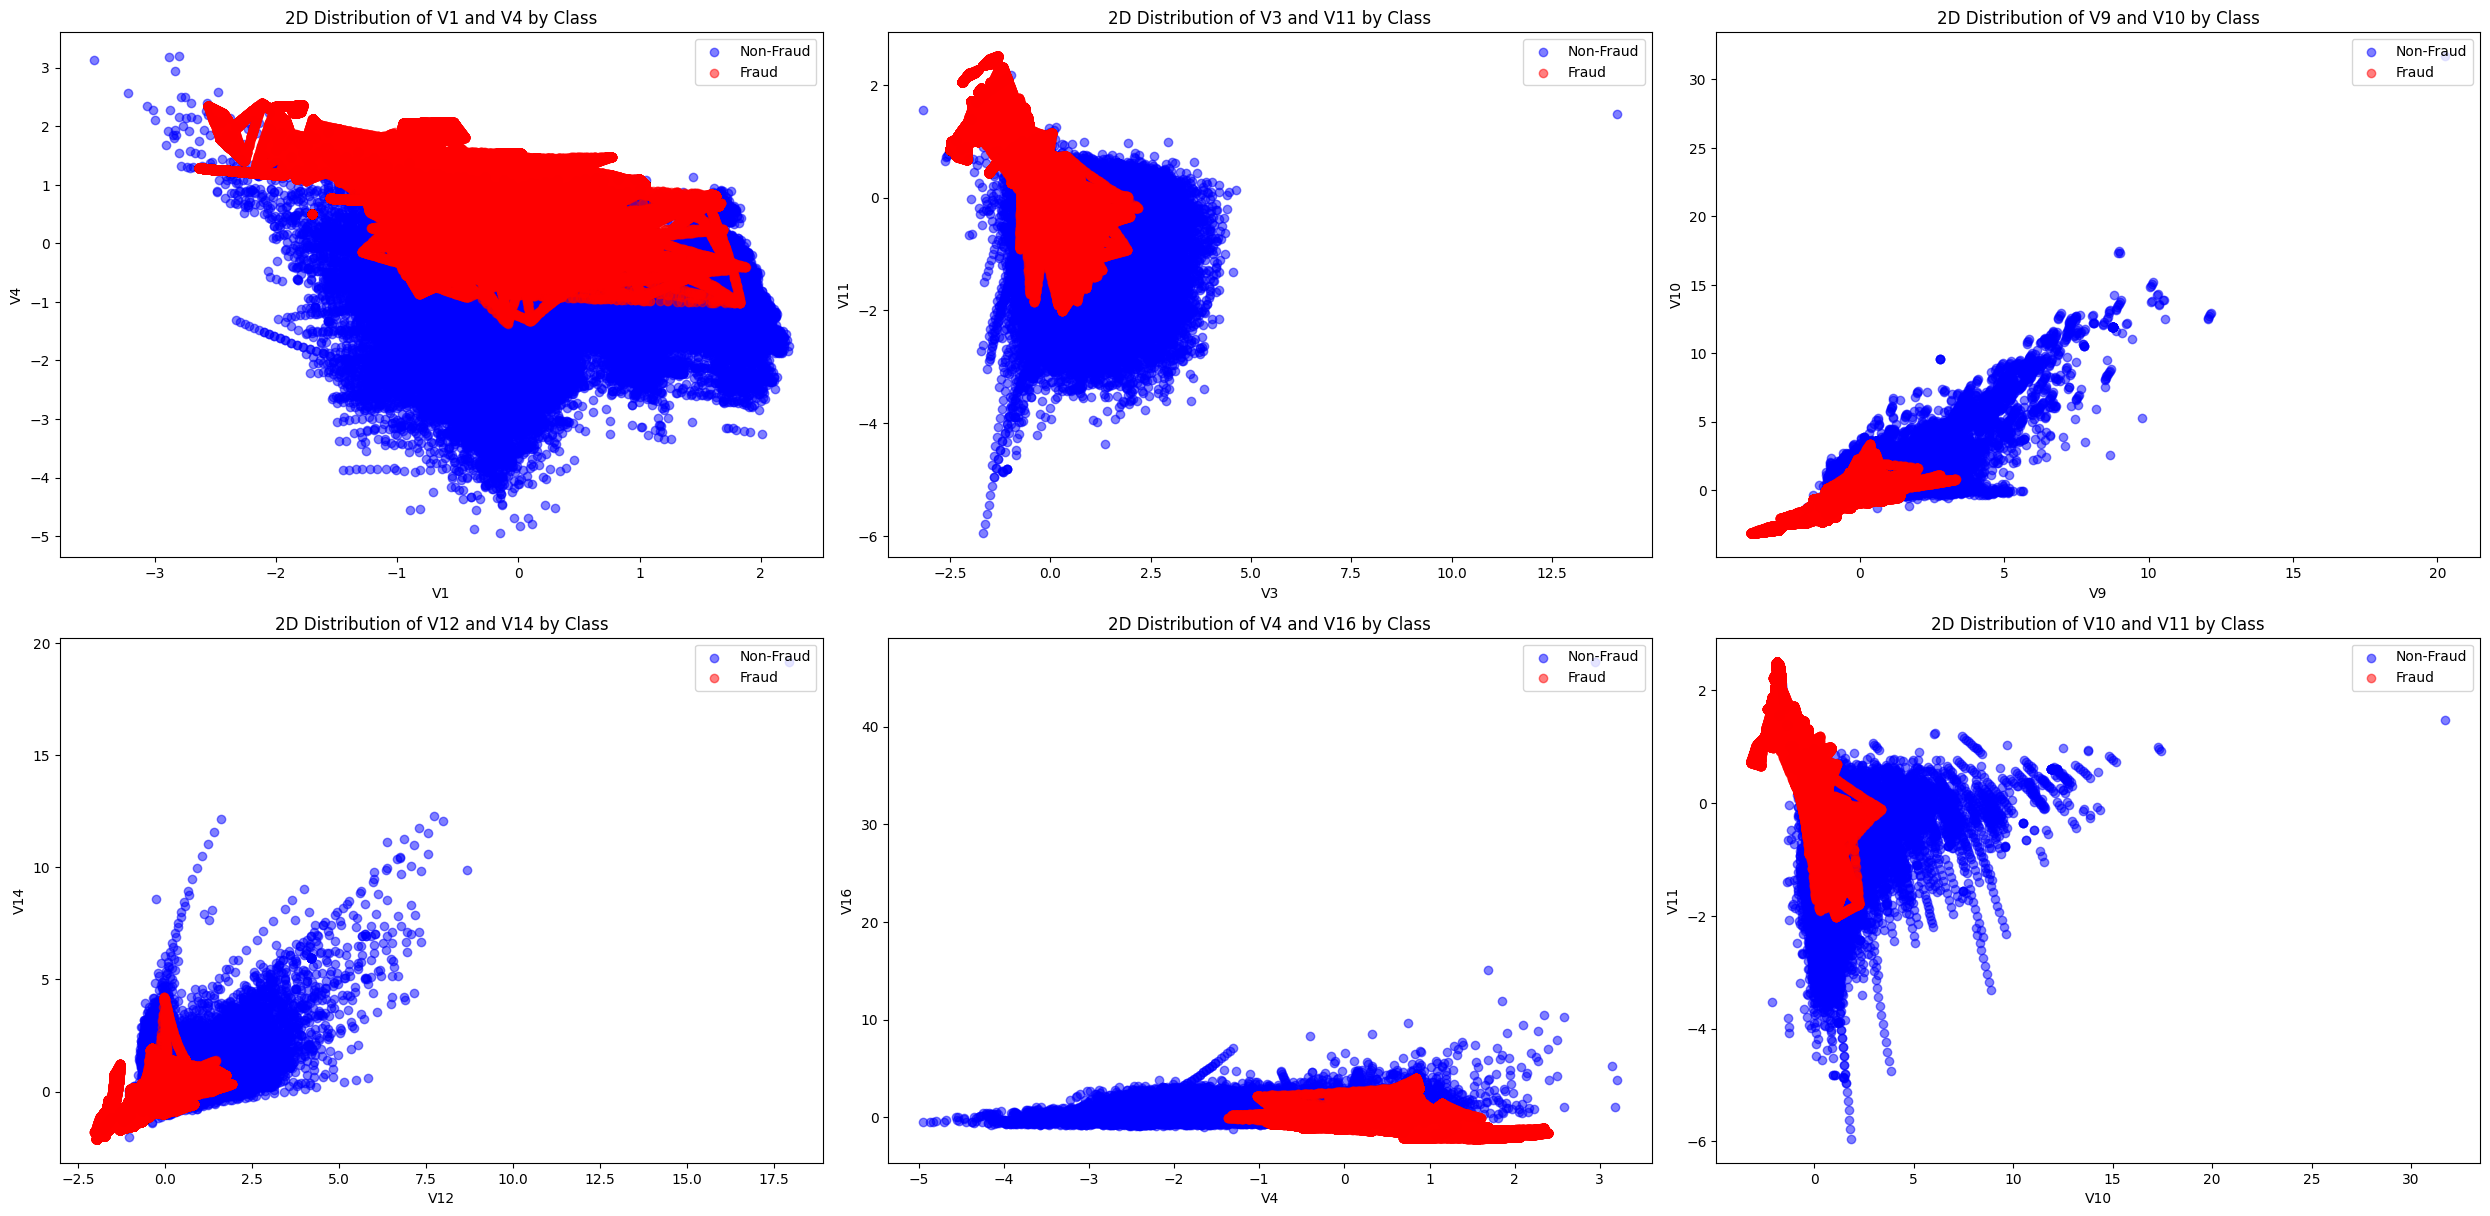

In [17]:
# Define pairs of variables to compare
variable_pairs = [('V1', 'V4'), ('V3', 'V11'), ('V9', 'V10'), ('V12', 'V14'), ('V4', 'V16'), ('V10','V11')]

# Set up the figure size and grid layout
plt.figure(figsize=(25, 30))
n = 1  # Subplot counter

# Loop through each pair and create a subplot
for x_var, y_var in variable_pairs:
    plt.subplot(5, 3, n)
    plt.scatter(credit_card_df[credit_card_df['Class'] == 0][x_var], credit_card_df[credit_card_df['Class'] == 0][y_var], label='Non-Fraud', alpha=0.5, c='blue')
    plt.scatter(credit_card_df[credit_card_df['Class'] == 1][x_var], credit_card_df[credit_card_df['Class'] == 1][y_var], label='Fraud', alpha=0.5, c='red')
    plt.title(f'2D Distribution of {x_var} and {y_var} by Class')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(loc='upper right')
    n += 1  # Increment subplot counter

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

Based on the provided 2D distribution plots, here are insights derived from the observed patterns:

- **V1 and V4:** Along the V4 axis, there is a clear distinction between non-fraud and fraud transactions, indicating that V4 differentiates the two classes significantly. Fraud transactions on V4 are clustered in a narrower band than non-fraud transactions, which are spread across a wider range. V1 has overlapping distributions, implying it is less discriminatory between classes than V4.


- **V3 and V11:** Once again, V11 clearly distinguishes between non-fraud and fraud transactions, with fraud transactions forming a distinct cluster. V3 has some separation but more overlap than V11, which may make it less effective as a standalone feature for detecting fraud.


- **V9 and V10:** This plot shows a noticeable spread in non-fraud transactions, with a high-density area in the center. Fraud transactions form a distinct cluster within a specific range on the V10 axis, which could be a useful indicator for detecting fraud.


- **V12 and V14:** This plot shows that both V12 and V14 provide some class differentiation, with fraudulent transactions appearing as a separate cluster. Non-fraud transactions have a more dispersed distribution along both axes, implying a broader range of behavior in legitimate transactions.


- **V4 and V16:** V4 continues to demonstrate strong discriminatory power, identifying a distinct fraud cluster. V16, while less clear than V4, appears to help distinguish fraud transactions, which form a compact cluster compared to a more dispersed non-fraud pattern.


- **V10 and V11:** This comparison show a significant difference between non-fraud and fraudulent transactions. The dense cluster of fraud transactions on both the V10 and V11 axes suggests that these features may be highly predictive of fraudulent behavior.

## Data preparation

The dataset is divided into features (transaction_data) and labels (fraud_labels). The features include all of the data with the exception of the 'Class' and 'id' columns, which are removed. The 'Class' column, which indicates whether a transaction is fraudulent, serves as the label for the model to predict. The 'id' column is excluded because it is a unique identifier that has no predictive value for the model.

From the 2013 dataset we are excluding the 'Time' column since we want to compare it to the 2023 dataset and this column is not present in both of them.

In [19]:
transaction_data = credit_card_df.drop(["Class", "id"], axis=1)
fraud_labels = credit_card_df["Class"]

transaction_data_2 = credit_card_2_df.drop(["Class", "Time"], axis=1)
fraud_labels_2 = credit_card_2_df["Class"]

A random_seed is used to ensure reproducibility, which means that the data is split in the same way every time the code is run, which is critical for consistent modeling and evaluation.

In [20]:
random_seed = 99

**Train-Test Split:** The train_test_split function divides the dataset into two parts: a training set and a test set. The test set accounts for 30% of the total data.

In [21]:
transaction_data_train, transaction_data_test, fraud_labels_train, fraud_labels_test = train_test_split(transaction_data.values, fraud_labels.values, test_size=0.3, random_state=random_seed)

transaction_data_train_2, transaction_data_test_2, fraud_labels_train_2, fraud_labels_test_2 = train_test_split(transaction_data_2.values, fraud_labels_2.values, test_size=0.3, random_state=random_seed)

The StandardScaler is used to normalize the features by removing the mean and scaling to unit variance. This standardization is required because machine learning models, particularly those based on distance calculations, assume that all features are centered on zero and have the same variance.

In [22]:
scaler = StandardScaler()
transaction_data_train = scaler.fit_transform(transaction_data_train)
transaction_data_test = scaler.transform(transaction_data_test)

transaction_data_train_2 = scaler.fit_transform(transaction_data_train_2)
transaction_data_test_2 = scaler.transform(transaction_data_test_2)

In [23]:
print(len(credit_card_df))
print(len(credit_card_2_df))

568630
284807


In [24]:
n_train = len(transaction_data_train)
n_train_2 = len(transaction_data_train_2)
print(n_train)
print(n_train_2)

398041
199364


In [25]:
n_test = len(transaction_data_test)
n_test_2 = len(transaction_data_test_2)
print(n_test)
print(n_test_2)

170589
85443


In [26]:
print(n_train + n_test)
print(n_train_2 + n_test_2)

568630
284807


## Logistic Classification Model

In [27]:
log_model = LogisticRegression(random_state=random_seed)
log_model.fit(transaction_data_train, fraud_labels_train);
log_fraud_pred = log_model.predict(transaction_data_test)
accuracy_2023 = accuracy_score(fraud_labels_test, log_fraud_pred)

log_model_2 = LogisticRegression(random_state=random_seed)
log_model_2.fit(transaction_data_train_2, fraud_labels_train_2);
log_fraud_pred_2 = log_model_2.predict(transaction_data_test_2)
accuracy_2013 = accuracy_score(fraud_labels_test_2, log_fraud_pred_2)

print(f'Accuracy comparison (Balanced Dataset): {accuracy_2023} vs (Imbalanced Dataset): {accuracy_2013}')

Accuracy comparison (Balanced Dataset): 0.9649801569855032 vs (Imbalanced Dataset): 0.9992158515033414


## Decision Tree Model

In [28]:
dt_model = DecisionTreeClassifier(random_state=random_seed)
dt_model.fit(transaction_data_train, fraud_labels_train);
dt_fraud_pred = dt_model.predict(transaction_data_test)
accuracy_2023 = accuracy_score(fraud_labels_test, dt_fraud_pred)

dt_model_2 = DecisionTreeClassifier(random_state=random_seed)
dt_model_2.fit(transaction_data_train_2, fraud_labels_train_2)
dt_fraud_pred_2 = dt_model_2.predict(transaction_data_test_2)
accuracy_2013 = accuracy_score(fraud_labels_test_2, dt_fraud_pred_2)

print(f'Accuracy comparison (Balanced Dataset): {accuracy_2023} vs (Imbalanced Dataset): {accuracy_2013}')

Accuracy comparison (Balanced Dataset): 0.9976551829250421 vs (Imbalanced Dataset): 0.9989817773252344


## Random Forest Model

In [29]:
rf_model = RandomForestClassifier(max_depth=3, random_state=random_seed)
rf_model.fit(transaction_data_train, fraud_labels_train);
rf_fraud_pred = rf_model.predict(transaction_data_test)
accuracy_2023 = accuracy_score(fraud_labels_test, rf_fraud_pred)

rf_model_2 = RandomForestClassifier(max_depth=3, random_state=random_seed)
rf_model_2.fit(transaction_data_train_2, fraud_labels_train_2)
rf_fraud_pred_2 = rf_model_2.predict(transaction_data_test_2)
accuracy_2013 = accuracy_score(fraud_labels_test_2, rf_fraud_pred_2)

print(f'Accuracy comparison (Balanced Dataset): {accuracy_2023} vs (Imbalanced Dataset): {accuracy_2013}')

Accuracy comparison (Balanced Dataset): 0.9450023155068615 vs (Imbalanced Dataset): 0.9992275552122467


## XGBoost Model

In [30]:
xgb_model = XGBClassifier(max_depth=3, random_state=random_seed)
xgb_model.fit(transaction_data_train, fraud_labels_train)
xgb_fraud_pred = xgb_model.predict(transaction_data_test)
accuracy_2023 = accuracy_score(fraud_labels_test, xgb_fraud_pred)

xgb_model_2 = XGBClassifier(max_depth=3, random_state=random_seed)
xgb_model_2.fit(transaction_data_train_2, fraud_labels_train_2)
xgb_fraud_pred_2 = xgb_model_2.predict(transaction_data_test_2)
accuracy_2013 = accuracy_score(fraud_labels_test_2, xgb_fraud_pred_2)

print(f'Accuracy comparison (Balanced Dataset): {accuracy_2023} vs (Imbalanced Dataset): {accuracy_2013}')

Accuracy comparison (Balanced Dataset): 0.9966586356681849 vs (Imbalanced Dataset): 0.9995435553526912


## Comparison between different ML Models

In [31]:
models = [
    ('Logistic Regression', log_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model)
]

model_predictions = {
    'Logistic Regression': log_fraud_pred,
    'Decision Tree': dt_fraud_pred,
    'Random Forest': rf_fraud_pred,
    'XGBoost': xgb_fraud_pred
}

In [32]:
models_2 = [
    ('Logistic Regression', log_model_2),
    ('Decision Tree', dt_model_2),
    ('Random Forest', rf_model_2),
    ('XGBoost', xgb_model_2)
]

model_predictions_2 = {
    'Logistic Regression': log_fraud_pred_2,
    'Decision Tree': dt_fraud_pred_2,
    'Random Forest': rf_fraud_pred_2,
    'XGBoost': xgb_fraud_pred_2
}

### Confusion Matrices

#### Credit Card 2023 Dataset

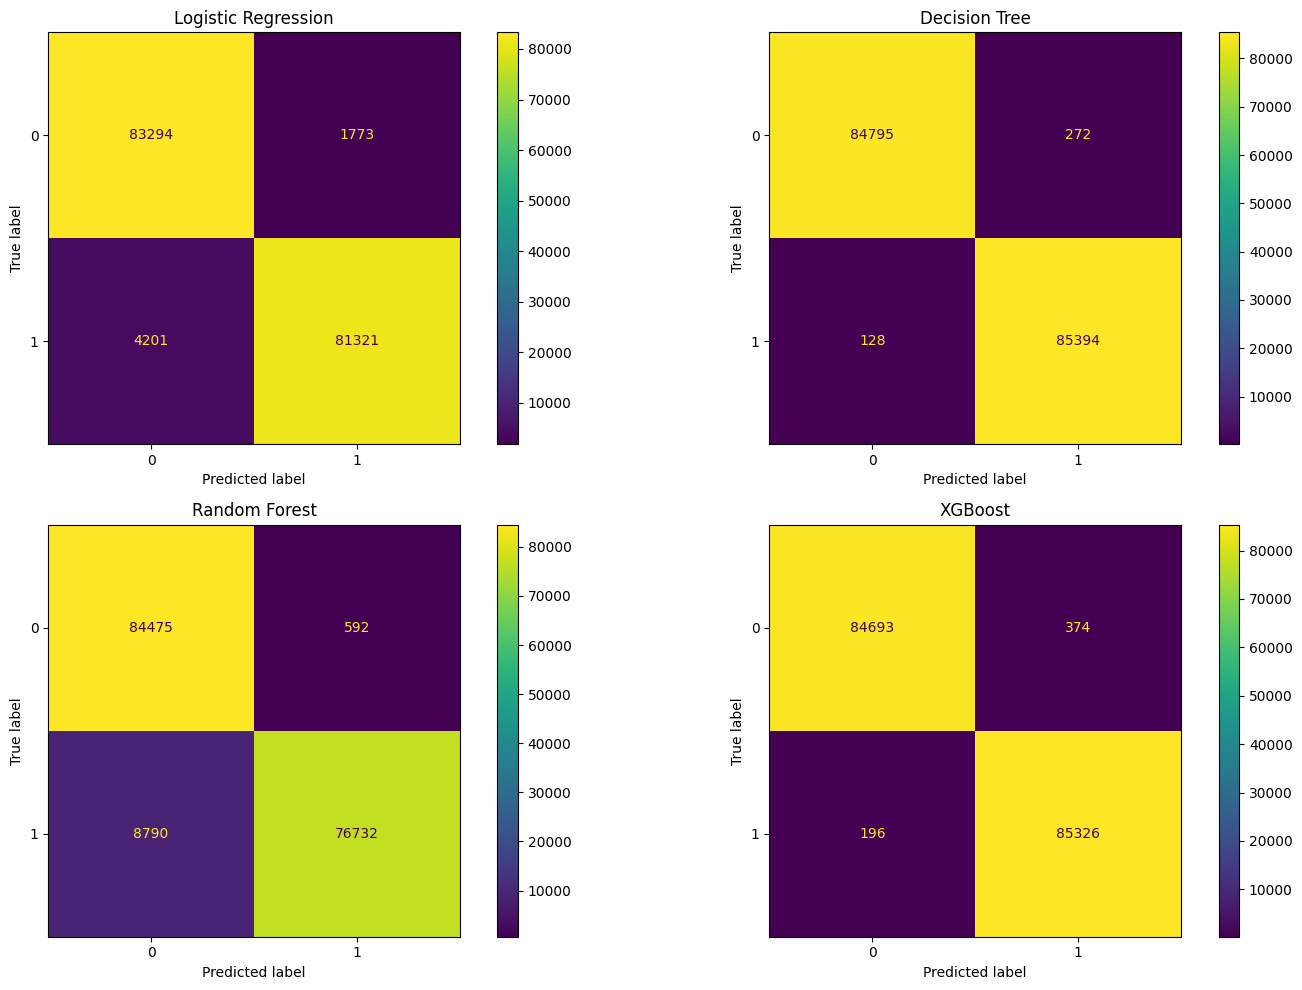

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the list of models and create confusion matrices on each subplot
for i, (name, model) in enumerate(models):
    ax = axes[i]
    ConfusionMatrixDisplay.from_estimator(model, transaction_data_test, fraud_labels_test, ax=ax)
    ax.title.set_text(name)

# If there are more subplots than models, remove the axes from the unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Credit Card 2013 Dataset

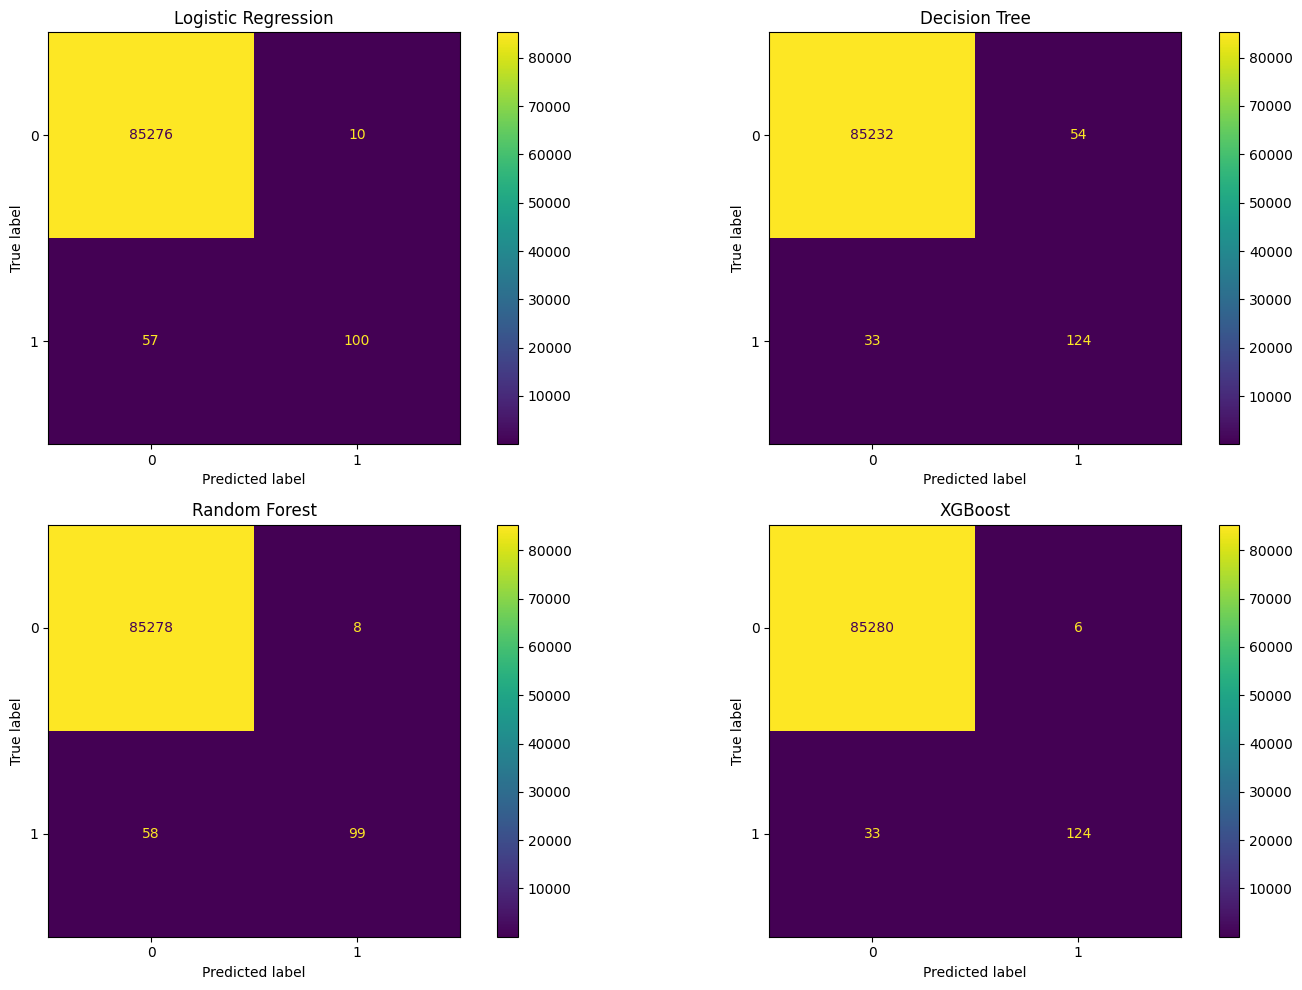

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the list of models and create confusion matrices on each subplot
for i, (name, model) in enumerate(models_2):
    ax = axes[i]
    ConfusionMatrixDisplay.from_estimator(model, transaction_data_test_2, fraud_labels_test_2, ax=ax)
    ax.title.set_text(name)

# If there are more subplots than models, remove the axes from the unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### ROC and Precision-Recall Curve

#### Credit Card 2023 Dataset

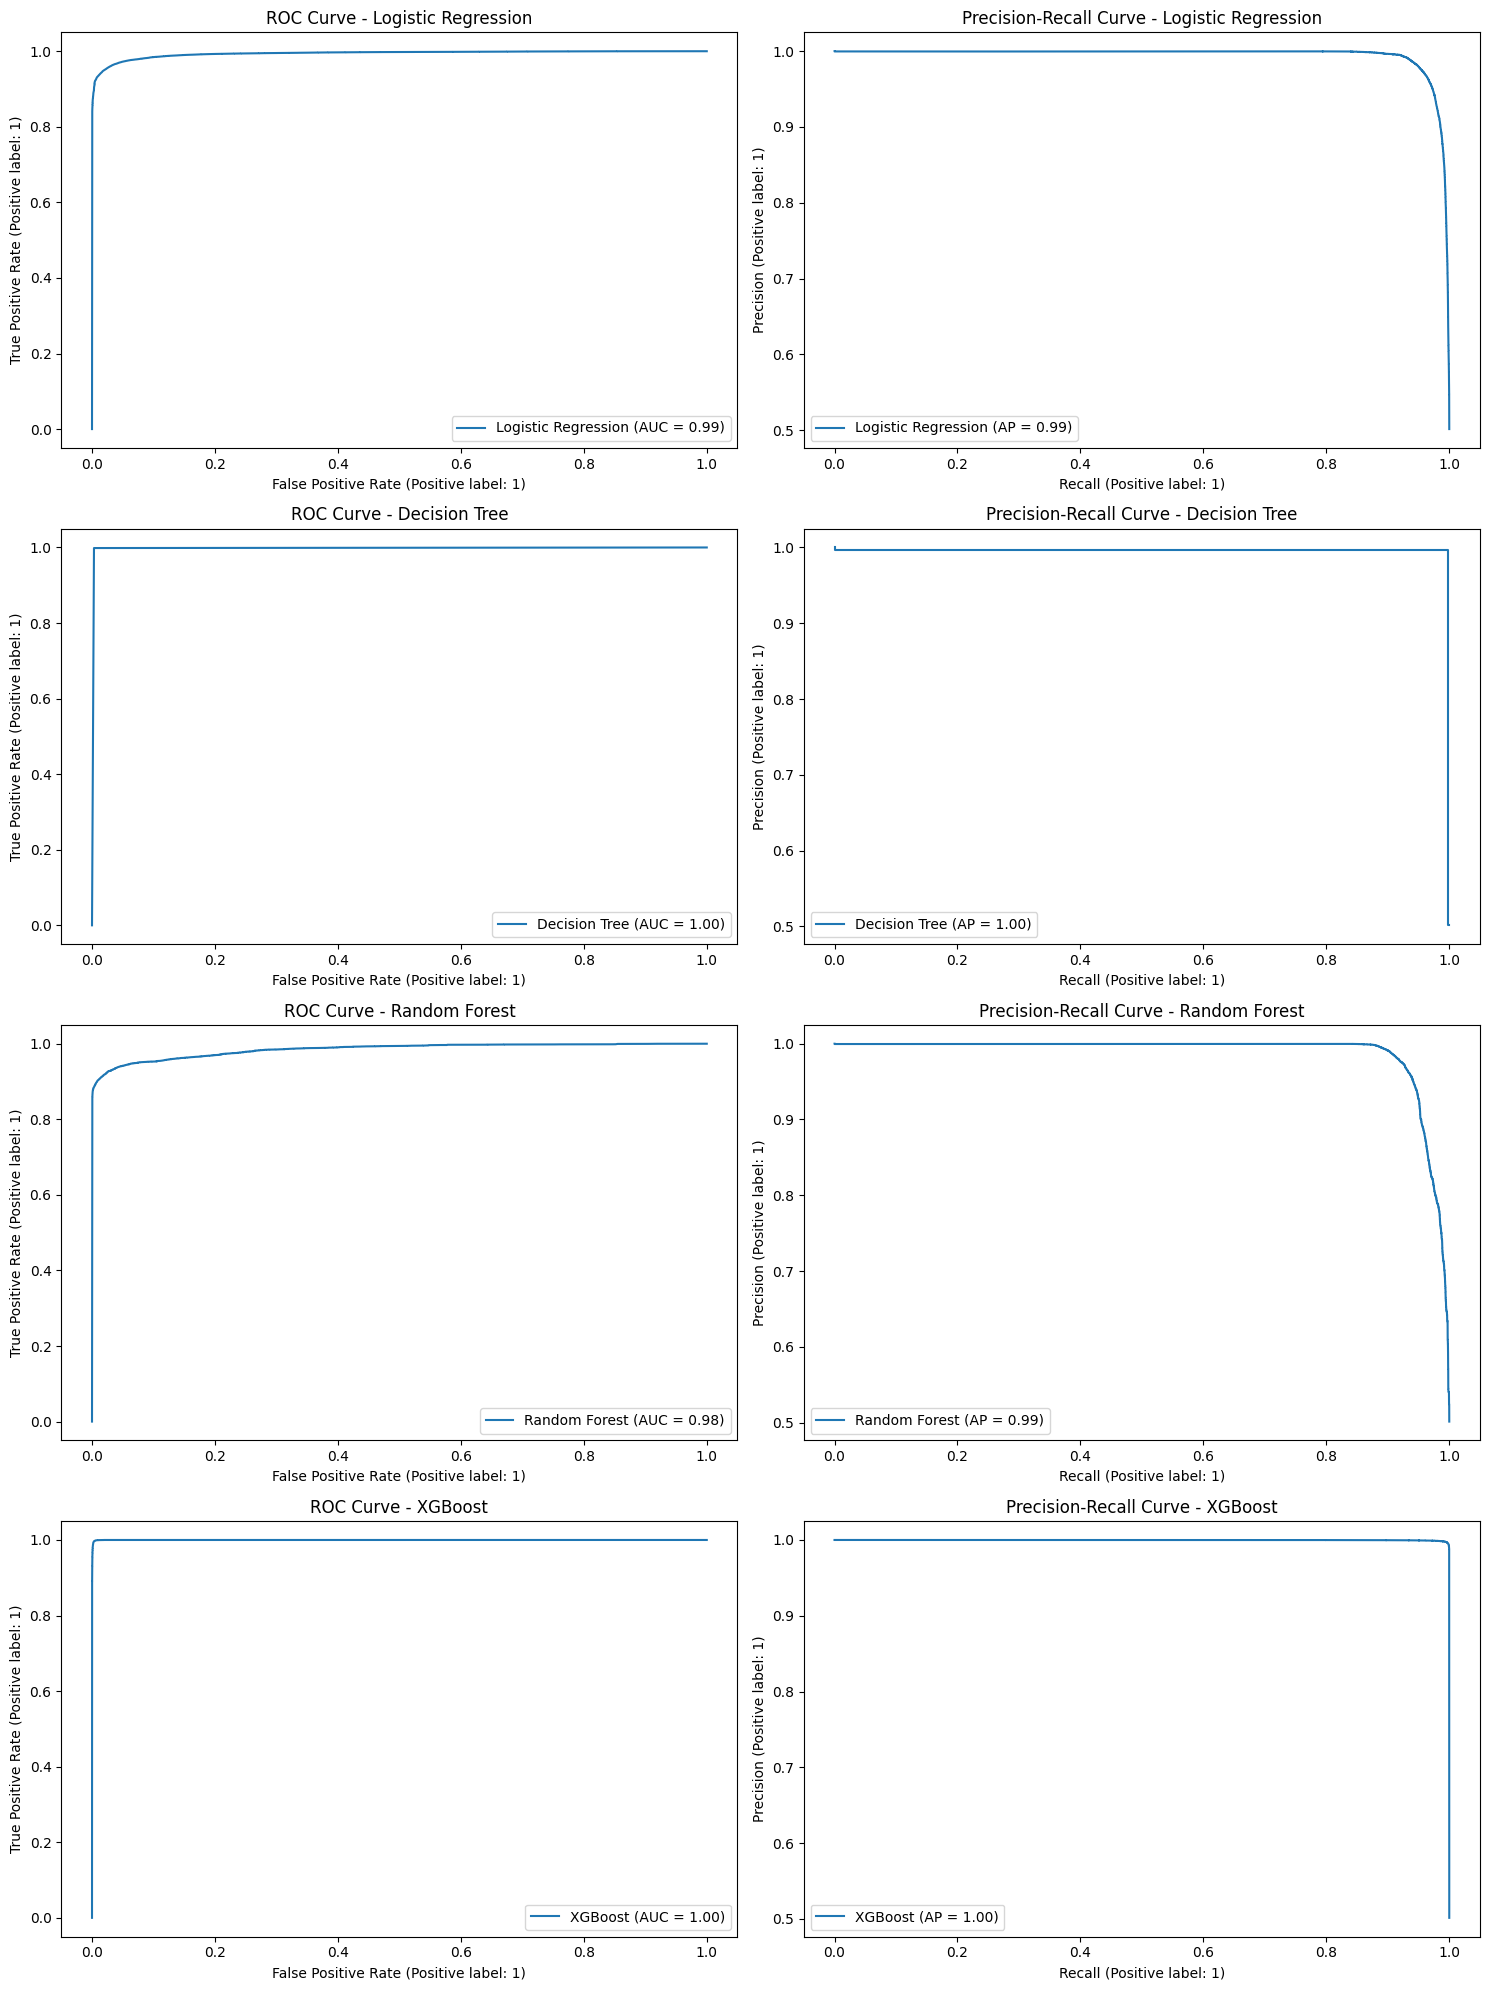

In [35]:
# Calculate the required number of rows to accommodate all the models in pairs of plots (ROC and Precision-Recall)
n_models = len(models)
n_rows = n_models

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))

# Iterate through the models, and plot ROC and Precision-Recall on corresponding axes
for i, (name, model) in enumerate(models):
    RocCurveDisplay.from_estimator(model, transaction_data_test, fraud_labels_test, ax=axes[i, 0], name=name)
    PrecisionRecallDisplay.from_estimator(model, transaction_data_test, fraud_labels_test, ax=axes[i, 1], name=name)
    axes[i, 0].set_title(f'ROC Curve - {name}')
    axes[i, 1].set_title(f'Precision-Recall Curve - {name}')

# Adjust the layout to prevent overlapping plots and labels
plt.tight_layout()
plt.show()

#### Credit Card 2013 Dataset

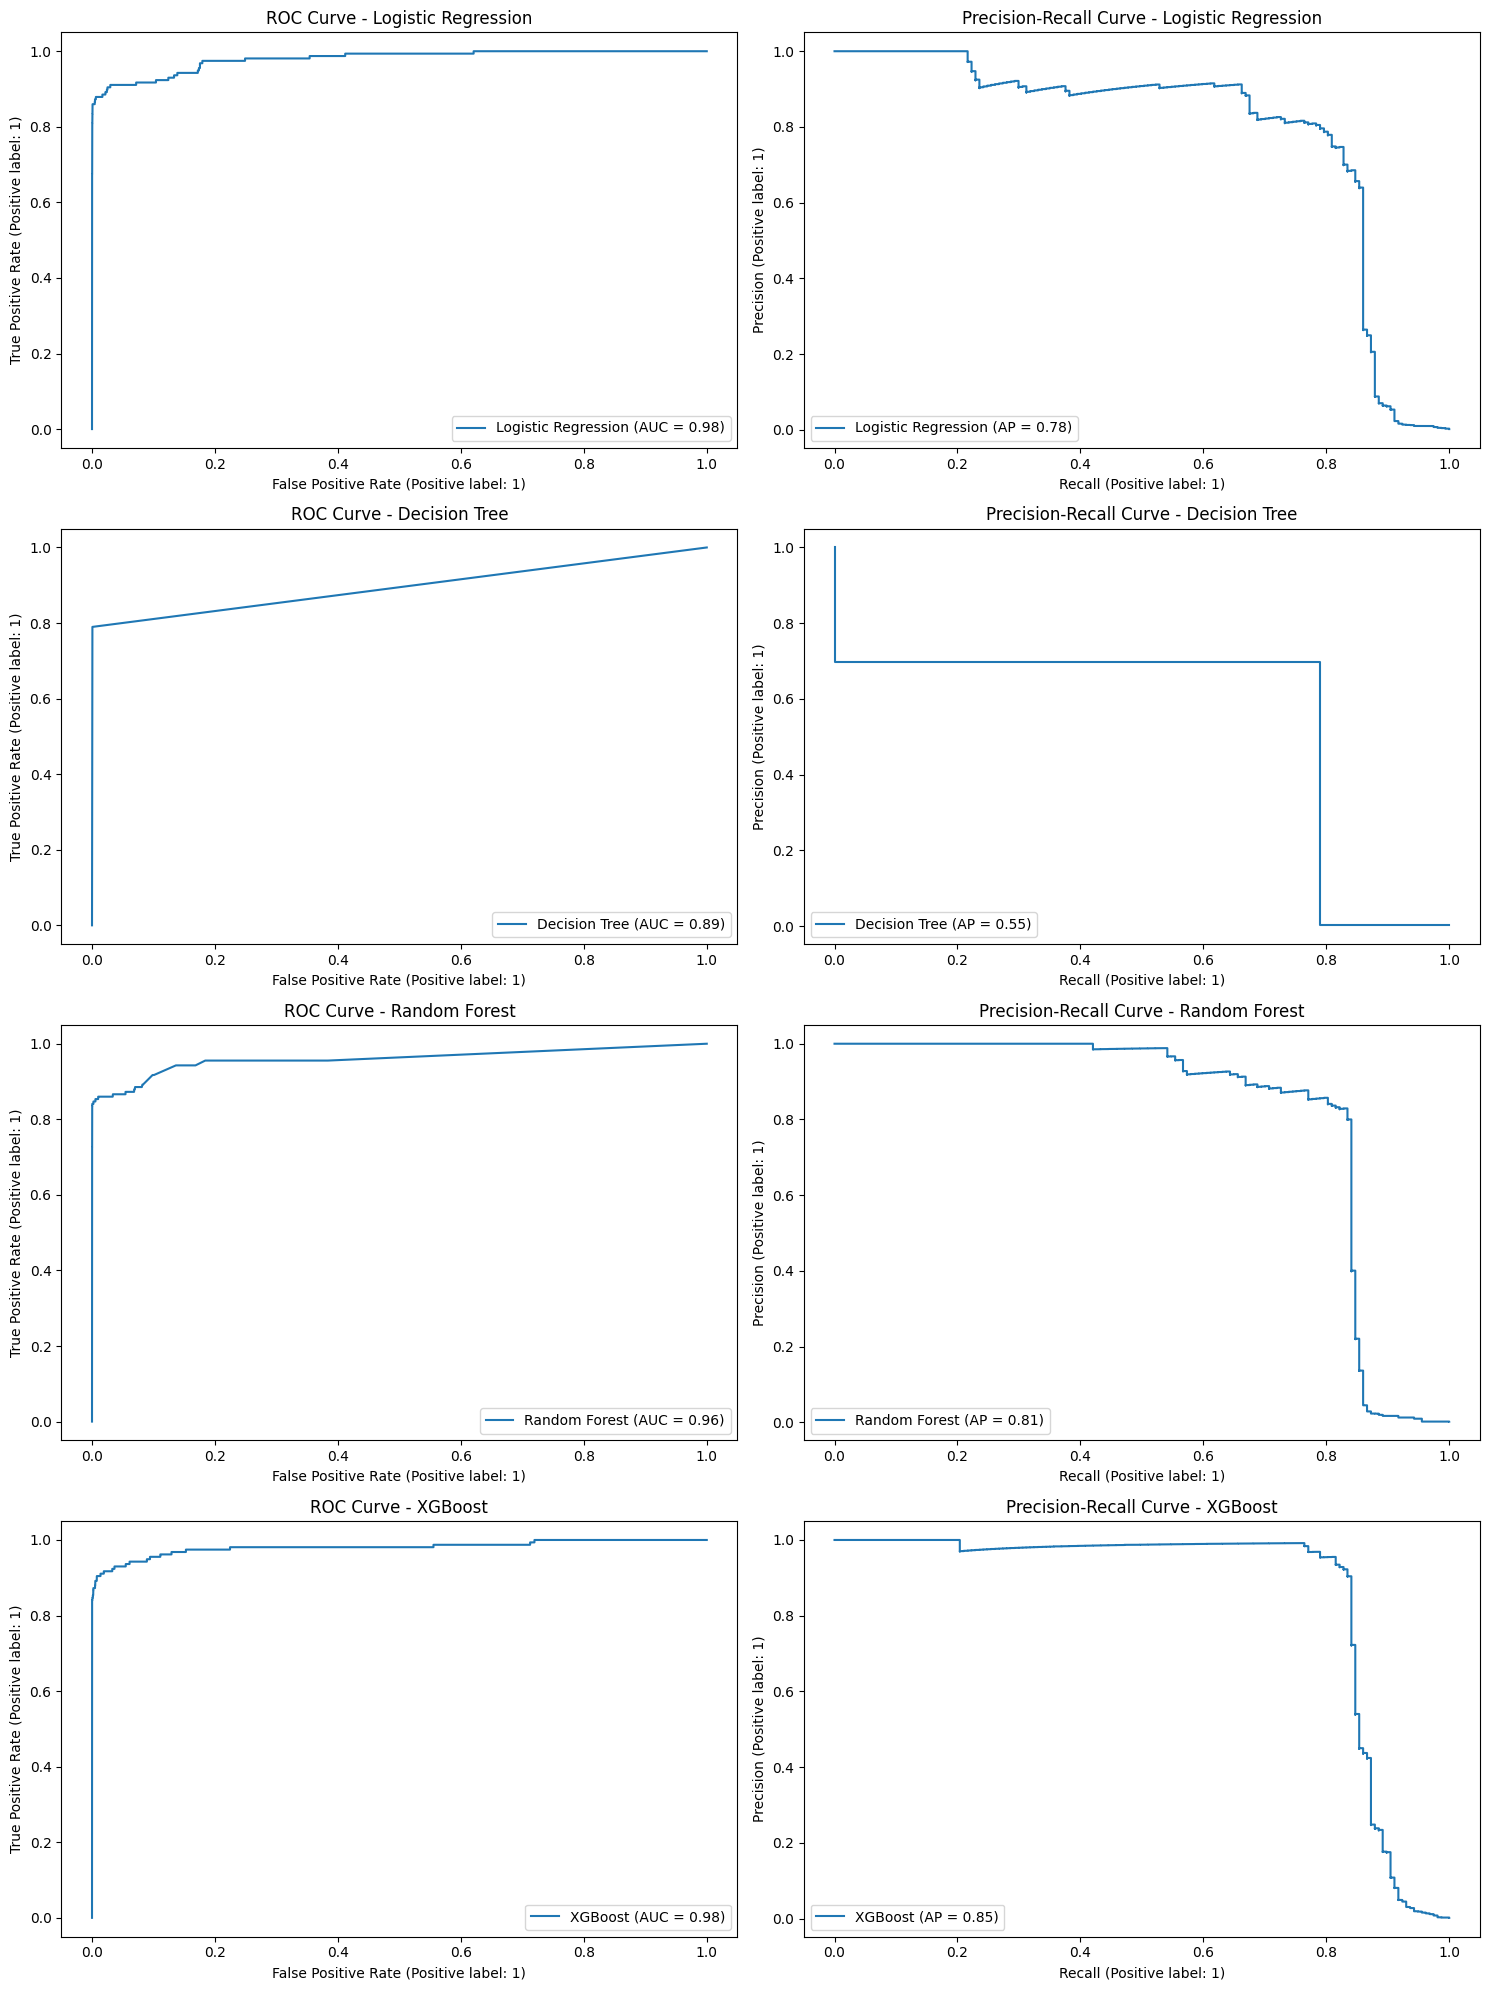

In [36]:
# Calculate the required number of rows to accommodate all the models in pairs of plots (ROC and Precision-Recall)
n_models = len(models_2)
n_rows = n_models

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))

# Iterate through the models, and plot ROC and Precision-Recall on corresponding axes
for i, (name, model) in enumerate(models_2):
    RocCurveDisplay.from_estimator(model, transaction_data_test_2, fraud_labels_test_2, ax=axes[i, 0], name=name)
    PrecisionRecallDisplay.from_estimator(model, transaction_data_test_2, fraud_labels_test_2, ax=axes[i, 1], name=name)
    axes[i, 0].set_title(f'ROC Curve - {name}')
    axes[i, 1].set_title(f'Precision-Recall Curve - {name}')

# Adjust the layout to prevent overlapping plots and labels
plt.tight_layout()
plt.show()

### Classification report

#### Credit Card 2023 Dataset

In [37]:
# Print the classification report for each model
for model_name, predictions in model_predictions.items():
    print(f"Classification report for {model_name}:\n\n{classification_report(fraud_labels_test, predictions)}\n")

Classification report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85067
           1       0.98      0.95      0.96     85522

    accuracy                           0.96    170589
   macro avg       0.97      0.97      0.96    170589
weighted avg       0.97      0.96      0.96    170589


Classification report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85067
           1       1.00      1.00      1.00     85522

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Classification report for Random Forest:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     85067
           1       0.99      0.90      0.94     85522

    accuracy                           0.95    1

#### Credit Card 2013 Dataset

In [38]:
# Print the classification report for each model
for model_name, predictions in model_predictions_2.items():
    print(f"Classification report for {model_name}:\n\n{classification_report(fraud_labels_test_2, predictions)}\n")

Classification report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.91      0.64      0.75       157

    accuracy                           1.00     85443
   macro avg       0.95      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443


Classification report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.70      0.79      0.74       157

    accuracy                           1.00     85443
   macro avg       0.85      0.89      0.87     85443
weighted avg       1.00      1.00      1.00     85443


Classification report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.93      0.63      0.75       157

    accuracy                           1.00     

# Deep Learning Models

### Converting to PyTorch tensors

In [39]:
# Dataset 2023
transaction_data_train_tensor = torch.tensor(transaction_data_train, dtype=torch.float32)
fraud_labels_train_tensor = torch.tensor(fraud_labels_train, dtype=torch.float32)
transaction_data_test_tensor = torch.tensor(transaction_data_test, dtype=torch.float32)
fraud_labels_test_tensor = torch.tensor(fraud_labels_test, dtype=torch.float32)

# Dataset 2013
transaction_data_train_tensor_2 = torch.tensor(transaction_data_train_2, dtype=torch.float32)
fraud_labels_train_tensor_2 = torch.tensor(fraud_labels_train_2, dtype=torch.float32)
transaction_data_test_tensor_2 = torch.tensor(transaction_data_test_2, dtype=torch.float32)
fraud_labels_test_tensor_2 = torch.tensor(fraud_labels_test_2, dtype=torch.float32)

### Creating dataloaders

In [40]:
torch.manual_seed(seed=random_seed)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(random_seed);

In [41]:
# Dataset 2023
train_dataset = TensorDataset(transaction_data_train_tensor, fraud_labels_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, worker_init_fn=seed_worker, generator=g)

test_dataset = TensorDataset(transaction_data_test_tensor, fraud_labels_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Dataset 2013
train_dataset_2 = TensorDataset(transaction_data_train_tensor_2, fraud_labels_train_tensor_2)
train_loader_2 = DataLoader(train_dataset_2, batch_size=64, shuffle=True, worker_init_fn=seed_worker, generator=g)

test_dataset_2 = TensorDataset(transaction_data_test_tensor_2, fraud_labels_test_tensor_2)
test_loader_2 = DataLoader(test_dataset_2, batch_size=64, shuffle=False)

### Creating Autoencoder

In [42]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### Creating Classifier

In [43]:
class Classifier(nn.Module):
    def __init__(self, input_size):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

### Creating hybrid autoencoder-classifier model

In [44]:
class HybridModel(nn.Module):
    def __init__(self, autoencoder, classifier):
        super(HybridModel, self).__init__()
        self.autoencoder = autoencoder
        self.classifier = classifier

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.autoencoder.encoder(x)
        x = self.classifier(x)
        return x

### Setting configurations

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = transaction_data_train.shape[1]

checkpoint_dir = './model_checkpoints'

learning_rate = 1e-3

encoding_size = 16

num_epochs = 10

print(f"""Settings:
  -Device: {device}
  -Input Size: {input_size}
  -Checkpoint Directory: {checkpoint_dir}

Hyperparameters:
  -Learning Rate: {learning_rate}
  -Encoding Size: {encoding_size}
  -Number of epochs: {num_epochs}""")

Settings:
  -Device: cpu
  -Input Size: 29
  -Checkpoint Directory: ./model_checkpoints

Hyperparameters:
  -Learning Rate: 0.001
  -Encoding Size: 16
  -Number of epochs: 10


### Instantiating the models

In [46]:
autoencoder = Autoencoder(input_size, encoding_size)
classifier = Classifier(encoding_size)
hybrid_model = HybridModel(autoencoder, classifier) # Model used for 2023 Dataset
hybrid_model

HybridModel(
  (autoencoder): Autoencoder(
    (encoder): Sequential(
      (0): Linear(in_features=29, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in_features=32, out_features=16, bias=True)
      (5): ReLU()
    )
    (decoder): Sequential(
      (0): Linear(in_features=16, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=29, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): Classifier(
    (fc): Linear(in_features=16, out_features=1, bias=True)
    (sigmoid): Sigmoid()
  )
)

### Loss and optimizer

In [47]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(hybrid_model.parameters(), lr=learning_rate)


### Move the model to the appropriate device

In [48]:
autoencoder.to(device)
classifier.to(device)
hybrid_model.to(device);

## Train the model with 2023 dataset

In [49]:
last_epoch = 0
train_losses = []
test_losses = []

In [50]:
# """ Execute only when loading saved model

start_epoch = 20
end_epoch = 20

num_epochs = end_epoch

# Load the checkpoint
checkpoint_path = f'./model_checkpoints/checkpoint_epoch_{start_epoch}.pth'  # Replace X with the specific epoch you're loading
# Use map_location to ensure compatibility with CPU-only systems
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu' if not torch.cuda.is_available() else 'cuda'))

# Load the model state
hybrid_model.load_state_dict(checkpoint['model_state_dict'])
hybrid_model.to(device)

# Load the optimizer state
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Retrieve the last epoch and loss values
last_epoch = checkpoint['epoch']
train_losses = checkpoint['train_losses']
test_losses = checkpoint['test_losses']
# """

In [51]:
""" Execute only when training model

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

for epoch in range(last_epoch, num_epochs):
    epoch_train_loss = 0.0
    epoch_test_loss = 0.0

    # Training phase
    hybrid_model.train()
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = hybrid_model(data)
        loss = criterion(outputs.squeeze(), labels)

        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Testing phase
    hybrid_model.eval()
    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)

            outputs = hybrid_model(data)
            loss = criterion(outputs.squeeze(), labels)

            epoch_test_loss += loss.item()

    epoch_test_loss /= len(test_loader)
    test_losses.append(epoch_test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')

    # Save checkpoint at the end of each 5th epoch
    if (epoch + 1) % 5 == 0:
      checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pth')
      torch.save({
          'epoch': epoch + 1,
          'model_state_dict': hybrid_model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'train_loss': epoch_train_loss,
          'test_loss': epoch_test_loss,
          'train_losses': train_losses,
          'test_losses': test_losses
      }, checkpoint_path)

# """

" Execute only when training model\n\nif not os.path.exists(checkpoint_dir):\n    os.makedirs(checkpoint_dir)\n\nfor epoch in range(last_epoch, num_epochs):\n    epoch_train_loss = 0.0\n    epoch_test_loss = 0.0\n\n    # Training phase\n    hybrid_model.train()\n    for data, labels in train_loader:\n        data, labels = data.to(device), labels.to(device)\n\n        optimizer.zero_grad()\n\n        outputs = hybrid_model(data)\n        loss = criterion(outputs.squeeze(), labels)\n\n        loss.backward()\n        optimizer.step()\n\n        epoch_train_loss += loss.item()\n\n    epoch_train_loss /= len(train_loader)\n    train_losses.append(epoch_train_loss)\n\n    # Testing phase\n    hybrid_model.eval()\n    with torch.no_grad():\n        for data, labels in test_loader:\n            data, labels = data.to(device), labels.to(device)\n\n            outputs = hybrid_model(data)\n            loss = criterion(outputs.squeeze(), labels)\n\n            epoch_test_loss += loss.item()\n\n

### Plotting both training and test losses

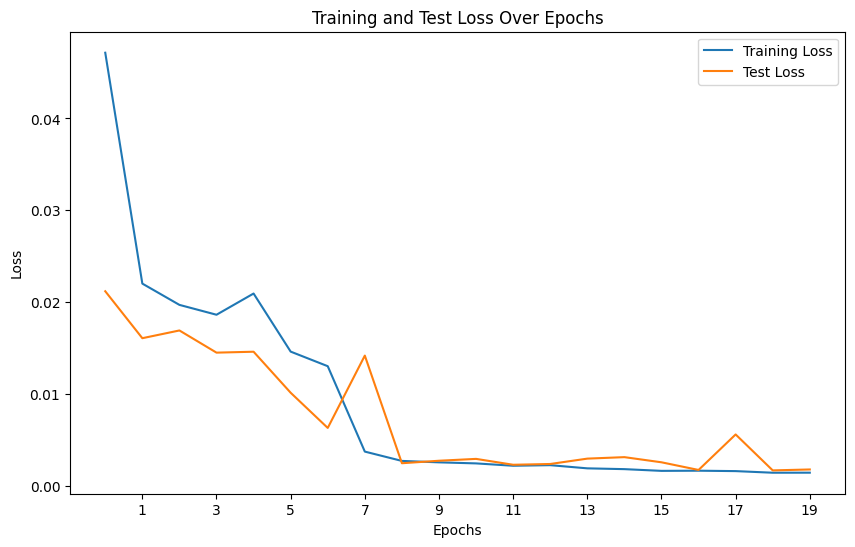

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xticks(np.arange(1, len(train_losses) + 1, step=max(1, len(train_losses)//10)))  # Adjust the step for readability
plt.legend()
plt.show()

## Evaluation

In [53]:
hybrid_model.eval()
with torch.no_grad():
    # Ensure the test data is on the correct device
    test_outputs = hybrid_model(transaction_data_test_tensor.to(device))
    # Convert probabilities to binary predictions using 0.5 as the threshold
    y_pred = (test_outputs.squeeze() > 0.5).cpu().numpy()
    y_true = fraud_labels_test_tensor.numpy()

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_true, test_outputs.squeeze().cpu().numpy())
average_precision = average_precision_score(y_true, test_outputs.squeeze().cpu().numpy());

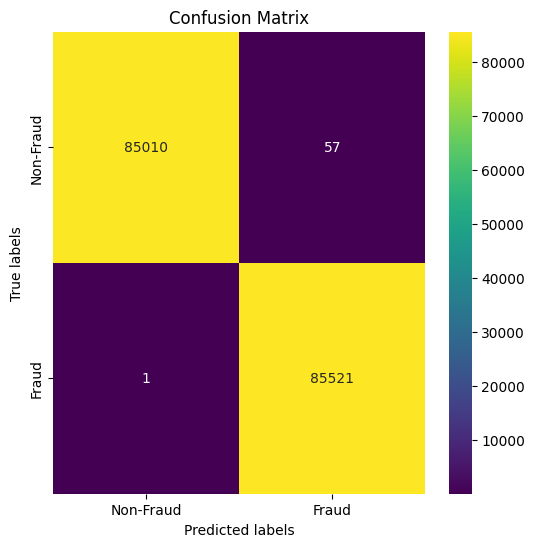

In [54]:
# Display the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


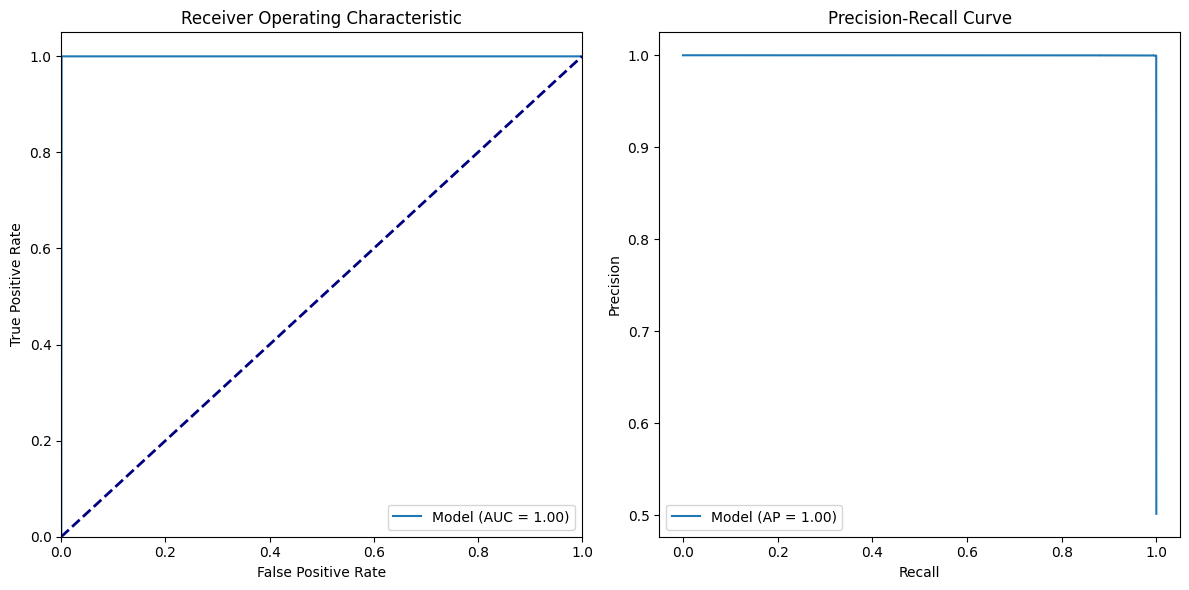

In [55]:
fig, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Model').plot(ax=ax_roc)
ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Receiver Operating Characteristic')

# Precision-Recall Curve
PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision, estimator_name='Model').plot(ax=ax_pr)
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()


In [56]:
# Print the classification report
print(classification_report(y_true, y_pred, target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85067
       Fraud       1.00      1.00      1.00     85522

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



## Train the model with 2013 dataset

### Creating Autoencoder

In [57]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size, dropout_probability=0.5):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(dropout_probability),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_probability),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(dropout_probability),
            nn.Linear(32, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 32),
            nn.ReLU(),
            nn.Dropout(dropout_probability),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Dropout(dropout_probability),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(dropout_probability),
            nn.Linear(128, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### Creating Classifier

In [58]:
class Classifier(nn.Module):
    def __init__(self, input_size, dropout_probability=0.5):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.dropout1 = nn.Dropout(dropout_probability)
        self.fc2 = nn.Linear(16, 4)
        self.dropout2 = nn.Dropout(dropout_probability)
        self.fc3 = nn.Linear(4, 1)
        self.dropout3 = nn.Dropout(dropout_probability)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.dropout3(x)
        x = self.sigmoid(x)
        return x

### Creating hybrid autoencoder-classifier model

In [59]:
class HybridModel(nn.Module):
    def __init__(self, autoencoder, classifier):
        super(HybridModel, self).__init__()
        self.autoencoder = autoencoder
        self.classifier = classifier

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.autoencoder.encoder(x)
        x = self.classifier(x)
        return x

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = transaction_data_train_2.shape[1]

checkpoint_dir = './model_checkpoints'

learning_rate_2 = 1e-5

encoding_size = 4

num_epochs_2 = 100

dropout = 0.2

print(f"""Settings:
  -Device: {device}
  -Input Size: {input_size}
  -Checkpoint Directory: {checkpoint_dir}

Hyperparameters:
  -Learning Rate: {learning_rate_2}
  -Encoding Size: {encoding_size}
  -Number of epochs: {num_epochs}
  -Dropout Probability: {dropout}""")

Settings:
  -Device: cpu
  -Input Size: 29
  -Checkpoint Directory: ./model_checkpoints

Hyperparameters:
  -Learning Rate: 1e-05
  -Encoding Size: 4
  -Number of epochs: 20
  -Dropout Probability: 0.2


### Instantiating the models

In [61]:
autoencoder = Autoencoder(input_size, encoding_size, dropout)
classifier = Classifier(encoding_size, dropout)
hybrid_model_2 = HybridModel(autoencoder, classifier) # Model used for 2013 Dataset
hybrid_model_2

HybridModel(
  (autoencoder): Autoencoder(
    (encoder): Sequential(
      (0): Linear(in_features=29, out_features=128, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=128, out_features=64, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=64, out_features=32, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.2, inplace=False)
      (9): Linear(in_features=32, out_features=4, bias=True)
      (10): ReLU()
    )
    (decoder): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=32, out_features=64, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=64, out_features=128, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.2, inplace=False)
      (9): Linear(in_features=128, out_features=29, bias=True)
      (10): Sigmoid()
    

### Loss and optimizer

In [62]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer_2 = optim.Adam(hybrid_model_2.parameters(), lr=learning_rate_2)

In [63]:
autoencoder.to(device)
classifier.to(device)
hybrid_model_2.to(device);

In [64]:
last_epoch_2 = 0
train_losses_2 = []
test_losses_2 = []

In [65]:
# """ Weighted error approach

fraud_labels_train_integers = fraud_labels_train_tensor_2.to(dtype=torch.int64).numpy()

# Calculate class weights
class_counts = np.bincount(fraud_labels_train_integers)
majority_class_weight = class_counts[1] / class_counts[0]
minority_class_weight = class_counts[0] / class_counts[1]

# Create a tensor of weights for the entire dataset
weights = torch.ones(len(fraud_labels_train_tensor))
weights[fraud_labels_train_tensor == 0] *= majority_class_weight
weights[fraud_labels_train_tensor == 1] *= minority_class_weight

# Now, initialize BCELoss without the weight parameter
criterion = nn.BCELoss(reduction='none')

# """

In [76]:
# """

start_epoch = 100
end_epoch = 500

num_epochs_2 = end_epoch

# Load the checkpoint
# checkpoint_2013_path = f'./model_checkpoints/checkpoint_2013_epoch_{start_epoch}.pth' # Initial Hybrid Model
checkpoint_2013_path = f'./model_checkpoints/checkpoint_2013_v3_epoch_{start_epoch}.pth' # Dropout Hybrid Model

# Use map_location to ensure compatibility with CPU-only systems
checkpoint_2013 = torch.load(checkpoint_2013_path, map_location=torch.device('cpu' if not torch.cuda.is_available() else 'cuda'))

# Load the model state
hybrid_model_2.load_state_dict(checkpoint_2013['model_state_dict'])
hybrid_model_2.to(device)

# Load the optimizer state
optimizer_2.load_state_dict(checkpoint_2013['optimizer_state_dict'])

# Retrieve the last epoch and loss values
last_epoch_2 = checkpoint_2013['epoch']
train_losses_2 = checkpoint_2013['train_losses']
test_losses_2 = checkpoint_2013['test_losses']
# """

In [77]:
# """

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

for epoch in range(last_epoch_2, num_epochs_2):
    epoch_train_loss = 0.0
    epoch_test_loss = 0.0

    # Training phase
    hybrid_model_2.train()
    for data, labels in train_loader_2:
        data, labels = data.to(device), labels.to(device)

        optimizer_2.zero_grad()

        outputs = hybrid_model_2(data)
        loss = criterion(outputs.squeeze(), labels)

        # Execute if apply the weights to the loss
        batch_weights = weights[:len(labels)].to(device)  # Slice the weights for the current batch
        loss = (loss * batch_weights).mean()  # Take a mean loss after applying weights

        loss.backward()
        optimizer_2.step()

        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader_2)
    train_losses_2.append(epoch_train_loss)

    # Testing phase
    hybrid_model_2.eval()
    with torch.no_grad():
        for data, labels in test_loader_2:
            data, labels = data.to(device), labels.to(device)

            outputs = hybrid_model_2(data)
            # loss = criterion(outputs.squeeze(), labels)
            loss = criterion(outputs.squeeze(), labels).mean()  # Just take the mean loss if applied weights

            epoch_test_loss += loss.item()

    epoch_test_loss /= len(test_loader_2)
    test_losses_2.append(epoch_test_loss)
    if (epoch + 1) % 50 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs_2}], Training Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')

    # Save checkpoint at the end of each 10th epoch
    if (epoch + 1) % 50 == 0:
      checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_2013_v3_epoch_{epoch+1}.pth')
      torch.save({
          'epoch': epoch + 1,
          'model_state_dict': hybrid_model_2.state_dict(),
          'optimizer_state_dict': optimizer_2.state_dict(),
          'train_loss': epoch_train_loss,
          'test_loss': epoch_test_loss,
          'train_losses': train_losses_2,
          'test_losses': test_losses_2
      }, checkpoint_path)

# """

Epoch [150/500], Training Loss: 27.8849, Test Loss: 0.0043
Epoch [200/500], Training Loss: 27.5519, Test Loss: 0.0041
Epoch [250/500], Training Loss: 27.6508, Test Loss: 0.0039
Epoch [300/500], Training Loss: 27.9896, Test Loss: 0.0039
Epoch [350/500], Training Loss: 27.8667, Test Loss: 0.0038
Epoch [400/500], Training Loss: 27.8524, Test Loss: 0.0040
Epoch [450/500], Training Loss: 27.5972, Test Loss: 0.0039
Epoch [500/500], Training Loss: 28.1471, Test Loss: 0.0039


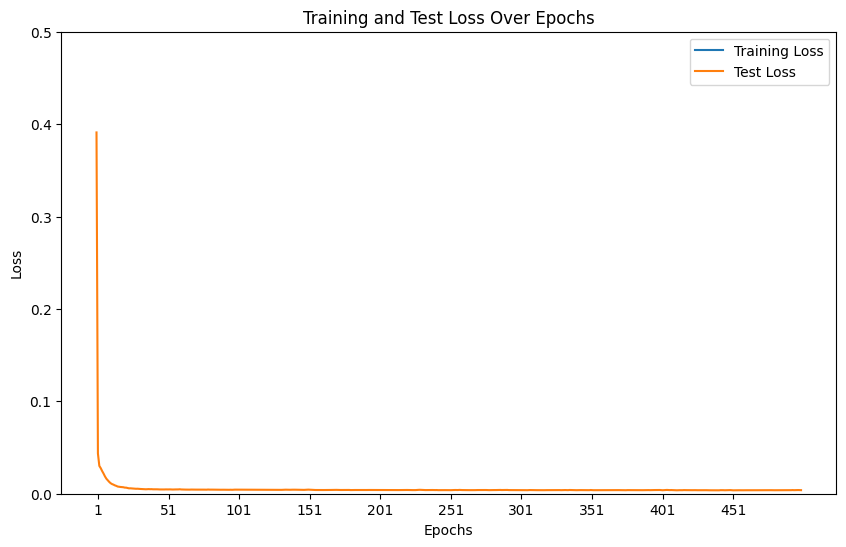

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses_2, label='Training Loss', scaley=False)
plt.plot(test_losses_2, label='Test Loss', scaley=False)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xticks(np.arange(1, len(train_losses_2) + 1, step=max(1, len(train_losses_2)//10)))  # Adjust the step for readability
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylim(0, 0.5)
plt.legend()
plt.show()

## Evaluation

In [79]:
hybrid_model_2.eval()
with torch.no_grad():
    # Ensure the test data is on the correct device
    test_outputs = hybrid_model_2(transaction_data_test_tensor_2.to(device))
    # Convert probabilities to binary predictions using 0.5 as the threshold
    y_pred = (test_outputs.squeeze() > 0.5).cpu().numpy()
    y_true = fraud_labels_test_tensor_2.numpy()

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_true, test_outputs.squeeze().cpu().numpy())
average_precision = average_precision_score(y_true, test_outputs.squeeze().cpu().numpy());

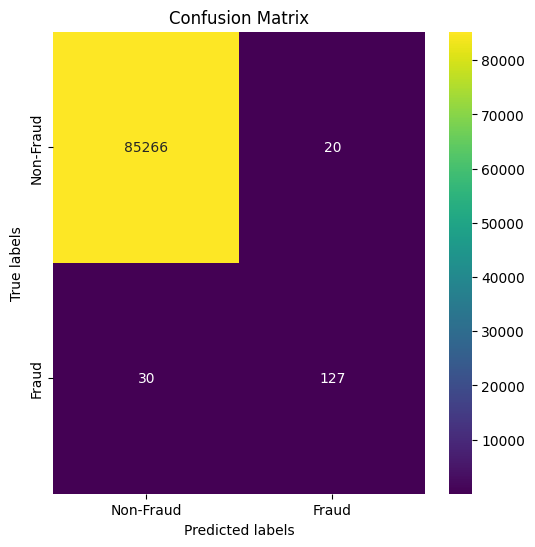

In [80]:
# Display the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

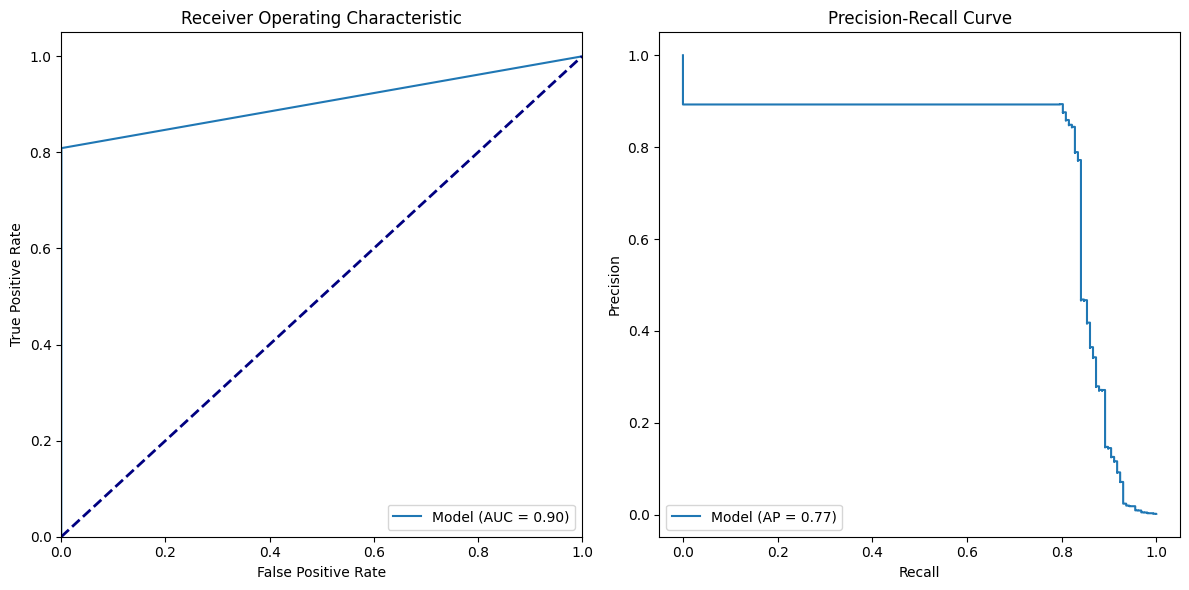

In [81]:
fig, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Model').plot(ax=ax_roc)
ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Receiver Operating Characteristic')

# Precision-Recall Curve
PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision, estimator_name='Model').plot(ax=ax_pr)
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

In [82]:
# Print the classification report
print(classification_report(y_true, y_pred, target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85286
       Fraud       0.86      0.81      0.84       157

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## Demo

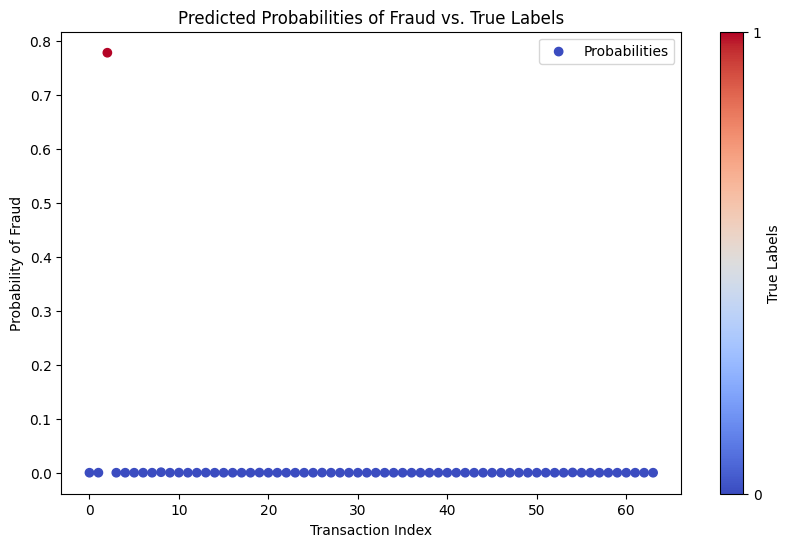

In [86]:
# Ensure your hybrid_model is in eval mode
hybrid_model_2.eval()

# Get one batch of test data
for transactions, labels in test_loader_2:
    if labels.mean() > 0:
        break  # We only need the first batch, so we break the loop

# Store probabilities and actual labels
probabilities = []
true_labels = []

# Go through the batch and make predictions
with torch.no_grad():
    for i in range(len(transactions)):
        transaction = transactions[i].unsqueeze(0)  # Add batch dimension
        label = labels[i].item()

        # Encode and classify the transaction
        encoded = hybrid_model_2.autoencoder.encoder(transaction.to(device))
        output = hybrid_model_2.classifier(encoded)
        probability = output

        # Store results
        probabilities.append(probability.item())
        true_labels.append(label)

# Convert lists to arrays for plotting
probabilities = np.array(probabilities)
true_labels = np.array(true_labels)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(probabilities)), probabilities, c=true_labels, cmap='coolwarm', label='Probabilities')
plt.colorbar(ticks=[0, 1], label='True Labels')
plt.xlabel('Transaction Index')
plt.ylabel('Probability of Fraud')
plt.title('Predicted Probabilities of Fraud vs. True Labels')
plt.legend()
plt.show()

Transaction 1:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 2:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 3:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 4:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 5:
Predicted probability of being fraudulent: 0.7776
Actual label: Fraudulent

Transaction 6:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 7:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 8:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 9:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent

Transaction 10:
Predicted probability of being fraudulent: 0.0000
Actual label: Non-Fraudulent



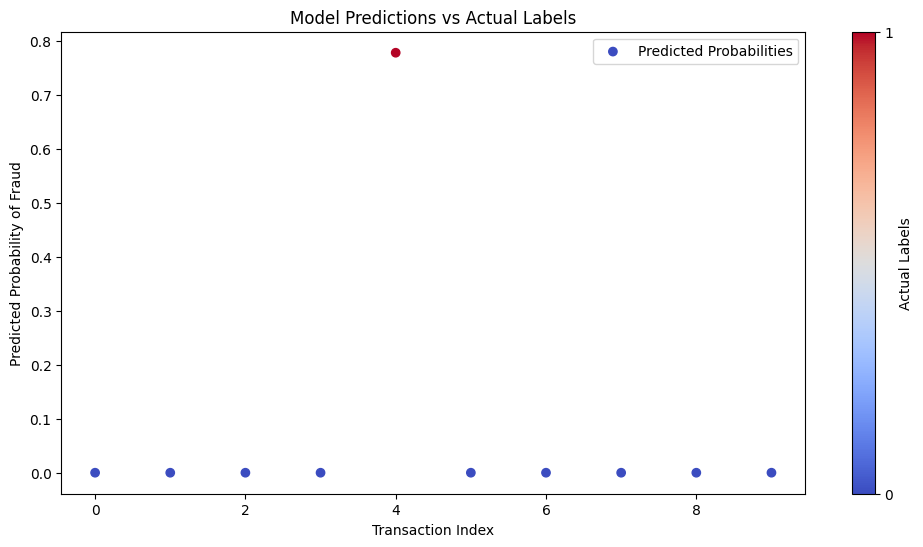

In [94]:
# Assuming hybrid_model_2 is your trained model, and test_dataset_2 is your test dataset
# Ensure the model is in evaluation mode
hybrid_model_2.eval()

# Create a DataLoader for the test dataset; for demonstration purposes, let's use a small batch size
test_loader_2_demo = DataLoader(test_dataset_2, batch_size=10, shuffle=True)

# Fetch a batch of test data
transactions, labels = next(iter(test_loader_2_demo))
while labels.mean() == 0:
  transactions, labels = next(iter(test_loader_2_demo))
  transactions, labels = transactions.to(device), labels.to(device)

# Perform inference
with torch.no_grad():
    encoded_transactions = hybrid_model_2.autoencoder.encoder(transactions)
    outputs = hybrid_model_2.classifier(encoded_transactions)
    probabilities = outputs.squeeze()

# Convert to numpy arrays for easier processing
probabilities = probabilities.cpu().numpy()
labels = labels.cpu().numpy()

# Print the results
for i in range(len(probabilities)):
    print(f'Transaction {i+1}:')
    print(f'Predicted probability of being fraudulent: {probabilities[i]:.4f}')
    print(f'Actual label: {"Fraudulent" if labels[i] == 1 else "Non-Fraudulent"}\n')

# Optionally, plot the results
# Note: This simplistic plot assumes that transactions can be represented in two dimensions.
# This might not be meaningful for your actual high-dimensional PCA-transformed data.
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(probabilities)), probabilities, c=labels, cmap='coolwarm', label='Predicted Probabilities')
plt.colorbar(ticks=[0, 1], label='Actual Labels')
plt.xlabel('Transaction Index')
plt.ylabel('Predicted Probability of Fraud')
plt.title('Model Predictions vs Actual Labels')
plt.legend()
plt.show()